In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime
from unidecode import unidecode
import geopandas as gpd
from shapely import wkt
from scipy import stats
import os

In [2]:
df=gpd.read_parquet(r"C:\Users\Andres\Downloads\captaciones_final.parquet")

In [3]:
df.loc[df["IDCAPTACION"] == 7032698, "CAUDAL_CONCESIONADO"] = 6.48

In [4]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 67336 entries, 0 to 67335
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   POZO_ASIGNADO_AL_PUNTO         67051 non-null  object        
 1   DISTANCIA_M_AL_POZO_ASIGNADO   67051 non-null  float64       
 2   IDUSUARIO                      67336 non-null  int32         
 3   IDPREDIO                       67336 non-null  int32         
 4   IDCONCESION                    67336 non-null  int32         
 5   IDCAPTACION                    67336 non-null  int32         
 6   IDUSO                          67336 non-null  int32         
 7   MUNICIPIO_PUNTO_CAPTACION      67336 non-null  object        
 8   OFERTA_HIDRICA_TOTAL           67326 non-null  float64       
 9   OFERTA_DISPONIBLE              67326 non-null  float64       
 10  ESTADO_CAPTACION               67336 non-null  object        
 11  CAUDAL_

In [5]:
Municipios_sabana = [
    "SOACHA", "SIBATE", "BOJACA", "MOSQUERA", "MADRID", "FACATATIVA", "FUNZA", "TENJO", "TABIO",
    "COTA", "SUBACHOQUE", "EL_ROSAL", "CAJICA", "CHIA", "ZIPAQUIRA", "NEMOCON", "COGUA", "LA_CALERA",
    "SOPO", "TOCANCIPA", "GACHANCIPA", "SESQUILE", "GUATAVITA", "CHOCONTA", "SUESCA", "VILLAPINZON"
]

In [6]:
cundinamarca=gpd.read_file(r"C:\Users\Andres\Downloads\Municipios_de_Cundinamarca_2022\Municipios_de_Cundinamarca_2022.shp")

In [7]:
cundinamarca.drop(columns=['OBJECTID','MpCodigo','MpArea', 'MpNorma', 'MpCategor','MpAltitud', 'Restriccio', 'Depto', 'Ley617'],inplace=True)

In [8]:
cundinamarca.rename(columns={"MpNombre":"MUNICIPIO"},inplace=True)

In [9]:
from unidecode import unidecode

cundinamarca["MUNICIPIO"] = (
    cundinamarca["MUNICIPIO"]
    .fillna("")
    .astype(str)
    .map(unidecode)         # quita tildes
    .str.upper()            # convierte a mayúsculas
    .str.replace(" ", "_")  # reemplaza espacios por _
)


In [10]:
sabana_bogota=cundinamarca[cundinamarca["MUNICIPIO"].isin(Municipios_sabana)]

# Variables de identificación del usuario

Son identificadores únicos de los registros:

IDUSUARIO

IDPREDIO

IDCONCESION

IDCAPTACION

IDUSO

POZO_ASIGNADO_AL_PUNTO

ID_POZO_MONITOREO

No aportan aspectos relevantes al analisis. 

# Variables espaciales y administrativas relevantes (contexto territorial)

introducen variabilidad espacial

MUNICIPIO_PUNTO_CAPTACION

MUNICIPIO_POZO_MONITOREO

REGION

SUBZONA

CUENCA_HIDROGRAFICA

ESTRUCTURA_GEOLOGICA

UNIDAD GEOLOGICA

NOMBREFUENTE

TIPOFUENTECAPTACION

TIPOUSO (si no es solo un código, sino la categoría de uso del agua)

DESCRIPCIONCIUU (aunque está incompleta, puede ser un proxy de actividad económica)

In [11]:
#tabla frecuencia puntos de captación unicos por municipio
df.groupby('MUNICIPIO_PUNTO_CAPTACION')['IDCAPTACION'].nunique().sort_values(ascending=False)

MUNICIPIO_PUNTO_CAPTACION
TENJO          255
MADRID          93
FACATATIVA      84
COTA            82
TOCANCIPA       69
EL_ROSAL        67
CHIA            59
CAJICA          57
FUNZA           51
GACHANCIPA      49
SOPO            48
NEMOCON         43
SUBACHOQUE      33
TABIO           26
MOSQUERA        23
SOACHA          18
ZIPAQUIRA       16
SUESCA          12
BOJACA          11
SIBATE           9
COGUA            8
SESQUILE         6
LA_CALERA        5
CHOCONTA         4
VILLAPINZON      1
Name: IDCAPTACION, dtype: int64

In [12]:
#tabla frecuencia de puntos de captación por región
df.groupby('REGION')['IDCAPTACION'].nunique().sort_values(ascending=False)

REGION
Sabana_Centro                      642
Sabana_Occidente                   444
Sabana_Sur                          27
Embalse_del_Tominé_Sabana_Norte     11
Provincia_Almeidas                   5
Name: IDCAPTACION, dtype: int64

In [13]:
#tabla frecuencia de puntos de captación por subzona
df.groupby('SUBZONA')['IDCAPTACION'].nunique().sort_values(ascending=False)

SUBZONA
Río Bogotá        1125
Alto Magdalena       3
Río Cabrera          1
Name: IDCAPTACION, dtype: int64

In [14]:
#tabla frecuencia de puntos de captación por cuenca hidrografica
df.groupby('CUENCA_HIDROGRAFICA')['IDCAPTACION'].nunique().sort_values(ascending=False)

CUENCA_HIDROGRAFICA
Alta Río Bogotá     691
Media Río Bogotá    372
Name: IDCAPTACION, dtype: int64

In [15]:
# tabla de frecuencia de puntos de captación por estructura geologica
df.groupby('ESTRUCTURA_GEOLOGICA')['IDCAPTACION'].nunique().sort_values(ascending=False)

ESTRUCTURA_GEOLOGICA
Sinclinal de Rio Frio             278
Sinclinal de Checua               195
Planicie Bogotá-Funza-Mosquera    191
Sinclinal de Suesca-Teusaca       172
Sinclinal de Subachoque           158
Sinclinal de Checua- Guacheta      27
Sinclinal de Sibaté                23
Sinclinal de Lenguazaque           14
Sinclinal del Sisga                 4
Sinclinal de Sibate                 1
Name: IDCAPTACION, dtype: int64

In [16]:
#tabla de frecuencia de puntos de captación por unidad geologica
df.groupby('UNIDAD GEOLOGICA')['IDCAPTACION'].nunique().sort_values(ascending=False)

UNIDAD GEOLOGICA
Depósitos cuaternarios    557
Grupo Guadalupe           373
Formación Cacho            68
Formación Bogotá           57
Formación Tilatá            4
Sinclinal de Checua         4
Name: IDCAPTACION, dtype: int64

In [17]:
#tabla de frecuencia de puntos de captación por unidad geologica
df.groupby('NOMBREFUENTE')['IDCAPTACION'].nunique().sort_values(ascending=False)

NOMBREFUENTE
SABANA DE BOGOTÁ/CUATERNARIO                        553
SABANA DE BOGOTÁ/CRETÁCICO SUPERIOR/SAM4.6          392
SABANA DE BOGOTÁ/NEÓGENO/SAM4.4                     103
SABANA DE BOGOTÁ/PALEÓGENO/SAM4.6                    57
SABANA DE BOGOTÁ/CRETÁCICO INFERIOR/SAM4.6           15
RÍO CHICÚ                                             2
COLOMBIA-DOLORES/CRETÁCICO SUPERIOR/SAM4.9            1
CONEJO/CRETÁCICO SUPERIOR/SAM4.8                      1
EMBALSE DEL MUÑA                                      1
PURIFICACIÓN Y SALDAÑA/CRETÁCICO INFERIOR/SMA2.2      1
RÍO ALTO BOGOTÁ                                       1
RÍO BOGOTÁ SECTOR SISGA - TIBITOC                     1
UBATÉ-CHIQUINQUIRÁ/CUATERNARIO/SAM4.5                 1
Name: IDCAPTACION, dtype: int64

In [18]:
#tabla de frecuencia de puntos de captación por unidad geologica
df.groupby('TIPOFUENTECAPTACION')['IDCAPTACION'].nunique().sort_values(ascending=False)

TIPOFUENTECAPTACION
Fuente subterranea    1129
Name: IDCAPTACION, dtype: int64

In [19]:
#tabla de frecuencia de puntos de captación por tipo de uso
df.groupby('TIPOUSO')['IDCAPTACION'].nunique().sort_values(ascending=False)

TIPOUSO
Agricola     701
Pecuario     566
Doméstico    530
Otro         111
Name: IDCAPTACION, dtype: int64

In [20]:
#tabla de frecuencia de puntos de captación por tipo de uso
df.groupby('DESCRIPCIONCIUU')['IDCAPTACION'].nunique().sort_values(ascending=False)


DESCRIPCIONCIUU
Captación, depuración y distribución de agua                            16
Cultivo de flor de corte                                                15
Actividad mixta (agrícola y pecuaria)                                    6
Captación, tratamiento y distribución de agua                            6
Actividades de apoyo a la agricultura                                    5
Cría de aves de corral                                                   3
Actividades inmobiliarias realizadas con bienes propios o arrendados     2
Cría de ganado bovino y bufalino                                         2
Explotación mixta (agrícola y pecuaria)                                  2
Educación media de formación técnica y profesional                       1
Producción especializada de otros cultivos n.c.p.                        1
Name: IDCAPTACION, dtype: int64

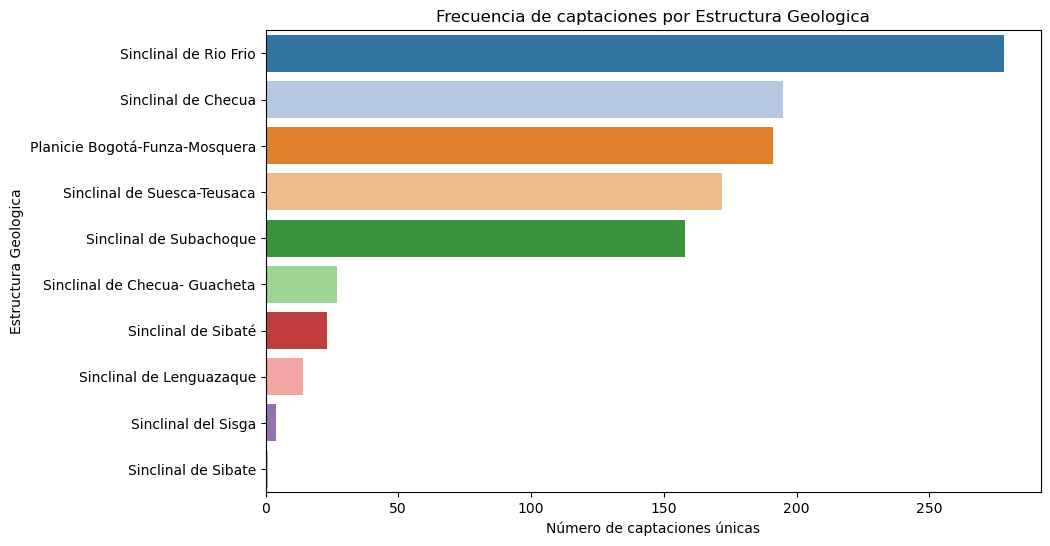

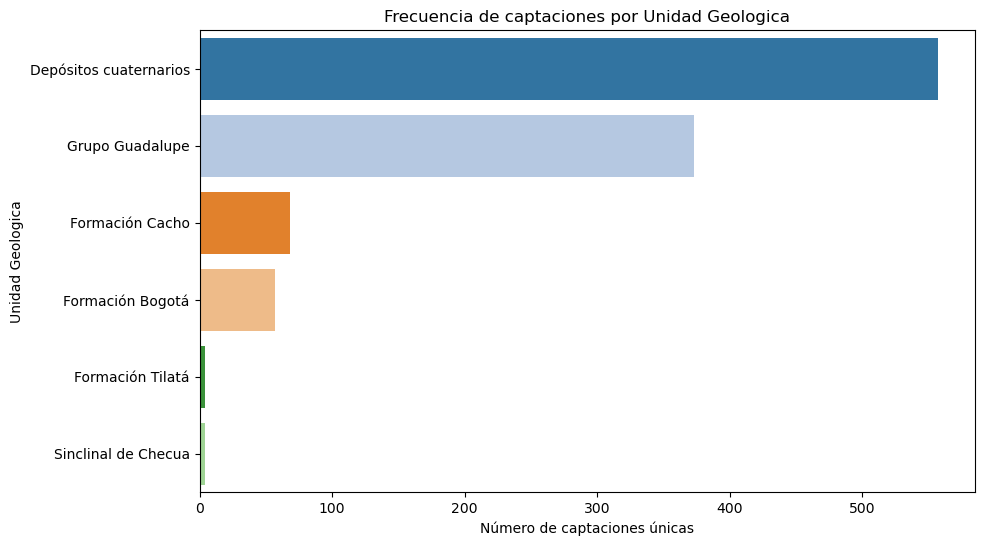

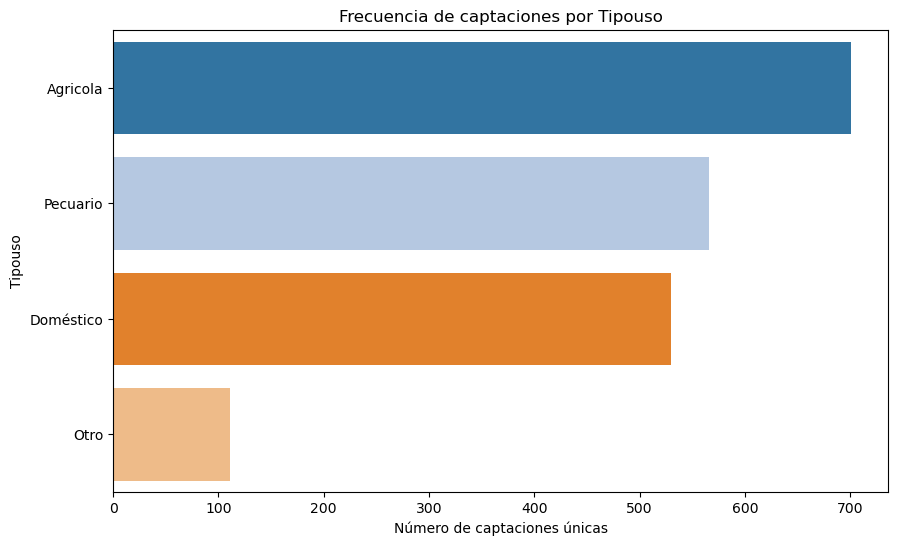

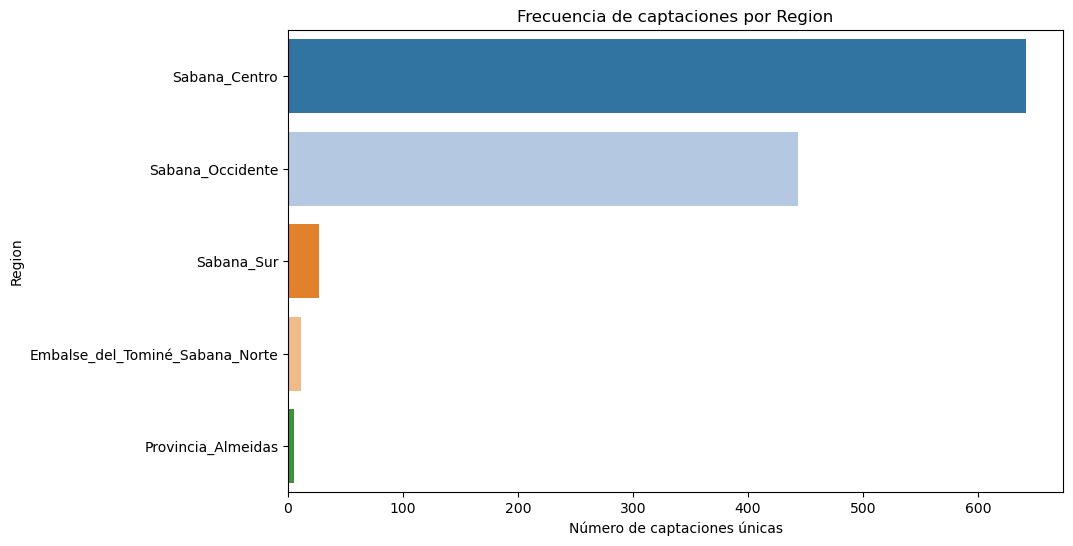

In [21]:
def plot_freq_bars(df, categoria, id_col='IDCAPTACION', top_n=None, palette="tab20"):
    """
    Grafica la frecuencia de captaciones únicas por categoría.
    
    Parámetros:
    -----------
    df : DataFrame
        Dataset con las variables
    categoria : str
        Nombre de la columna categórica
    id_col : str
        Columna con identificador único (ej. IDCAPTACION)
    top_n : int or None
        Número máximo de categorías a mostrar (ej. 10 más frecuentes)
    palette : str
        Paleta de colores (ej. 'tab20', 'Set3', 'Paired')
    """
    
    # Tabla de frecuencias
    tabla_freq = (
        df.groupby(categoria)[id_col]
        .nunique()
        .sort_values(ascending=False)
    )
    
    if top_n:
        tabla_freq = tabla_freq.head(top_n)
    
    tabla_df = tabla_freq.reset_index()
    tabla_df.columns = [categoria, 'NUM_CAPTACIONES']
    
    # Gráfico
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=tabla_df,
        y=categoria,
        x="NUM_CAPTACIONES",
        hue=categoria,       # cada categoría con color distinto
        dodge=False,
        palette=palette
    )
    
    plt.xlabel("Número de captaciones únicas")
    plt.ylabel(categoria.replace("_", " ").title())
    plt.title(f"Frecuencia de captaciones por {categoria.replace('_',' ').title()}")
    plt.legend([],[], frameon=False)  # ocultar leyenda redundante
    plt.show()


# Lista de categorías a graficar
categorias = ['ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA', 'TIPOUSO', 'REGION']

# Loop para generar las 4 gráficas
for cat in categorias:
    plot_freq_bars(df, categoria=cat)

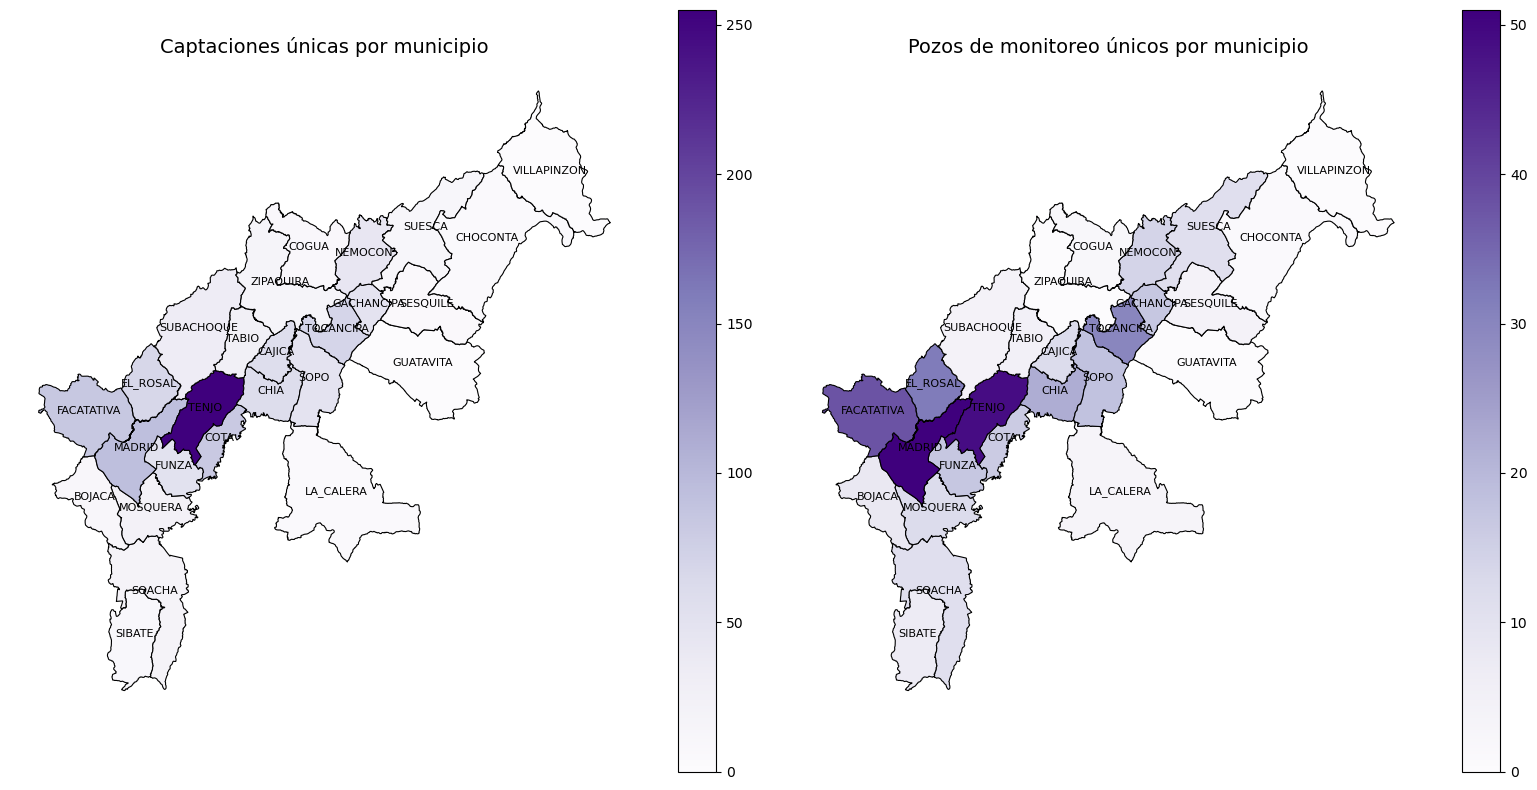

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Conteo captaciones por municipio (IDCAPTACION únicos) ---
captaciones_count = (
    df.groupby("MUNICIPIO_PUNTO_CAPTACION")["IDCAPTACION"]
    .nunique()
    .reset_index(name="NUM_CAPTACIONES")
)

# --- Conteo pozos por municipio (ID_POZO_MONITOREO únicos) ---
pozos_count = (
    df.groupby("MUNICIPIO_POZO_MONITOREO")["ID_POZO_MONITOREO"]
    .nunique()
    .reset_index(name="NUM_POZOS")
)

# --- Unir con la capa base ---
sabana_bogota = sabana_bogota.merge(
    captaciones_count,
    left_on="MUNICIPIO",
    right_on="MUNICIPIO_PUNTO_CAPTACION",
    how="left"
)

sabana_bogota = sabana_bogota.merge(
    pozos_count,
    left_on="MUNICIPIO",
    right_on="MUNICIPIO_POZO_MONITOREO",
    how="left"
)

# --- Usar las columnas correctas ---
sabana_bogota["NUM_CAPTACIONES"] = sabana_bogota["NUM_CAPTACIONES"].fillna(0)
sabana_bogota["NUM_POZOS"] = sabana_bogota["NUM_POZOS"].fillna(0)

# --- Graficar coropléticos con etiquetas ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Captaciones
sabana_bogota.plot(column="NUM_CAPTACIONES", cmap="Purples", linewidth=0.8, edgecolor="black",
                    legend=True, ax=axes[0])
axes[0].set_title("Captaciones únicas por municipio", fontsize=14)
axes[0].axis("off")

# Etiquetas de municipios en negro
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    axes[0].text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

# Pozos
sabana_bogota.plot(column="NUM_POZOS", cmap="Purples", linewidth=0.8, edgecolor="black",
                    legend=True, ax=axes[1])
axes[1].set_title("Pozos de monitoreo únicos por municipio", fontsize=14)
axes[1].axis("off")

# Etiquetas de municipios en negro
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    axes[1].text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

plt.tight_layout()
plt.show()

In [23]:
def graficar_captaciones_por_region(sabana_bogota, df, region_col="REGION", municipio_col="MUNICIPIO_PUNTO_CAPTACION"):
    regiones = df[region_col].unique()
    n = len(regiones)

    fig, axes = plt.subplots(1, n, figsize=(6*n, 8))

    if n == 1:
        axes = [axes]  # asegurar que axes sea iterable si hay una sola región

    for ax, region in zip(axes, regiones):
        # Subconjunto de puntos de la región
        puntos_region = df[df[region_col] == region]

        # Mapa base
        sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

        # Puntos de captación
        puntos_region.plot(ax=ax, color="blue", markersize=20, label="Captaciones")

        # Etiquetas de municipios
        for idx, row in sabana_bogota.iterrows():
            x, y = row.geometry.centroid.x, row.geometry.centroid.y
            ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

        ax.set_title(f"Captaciones en {region}", fontsize=14)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


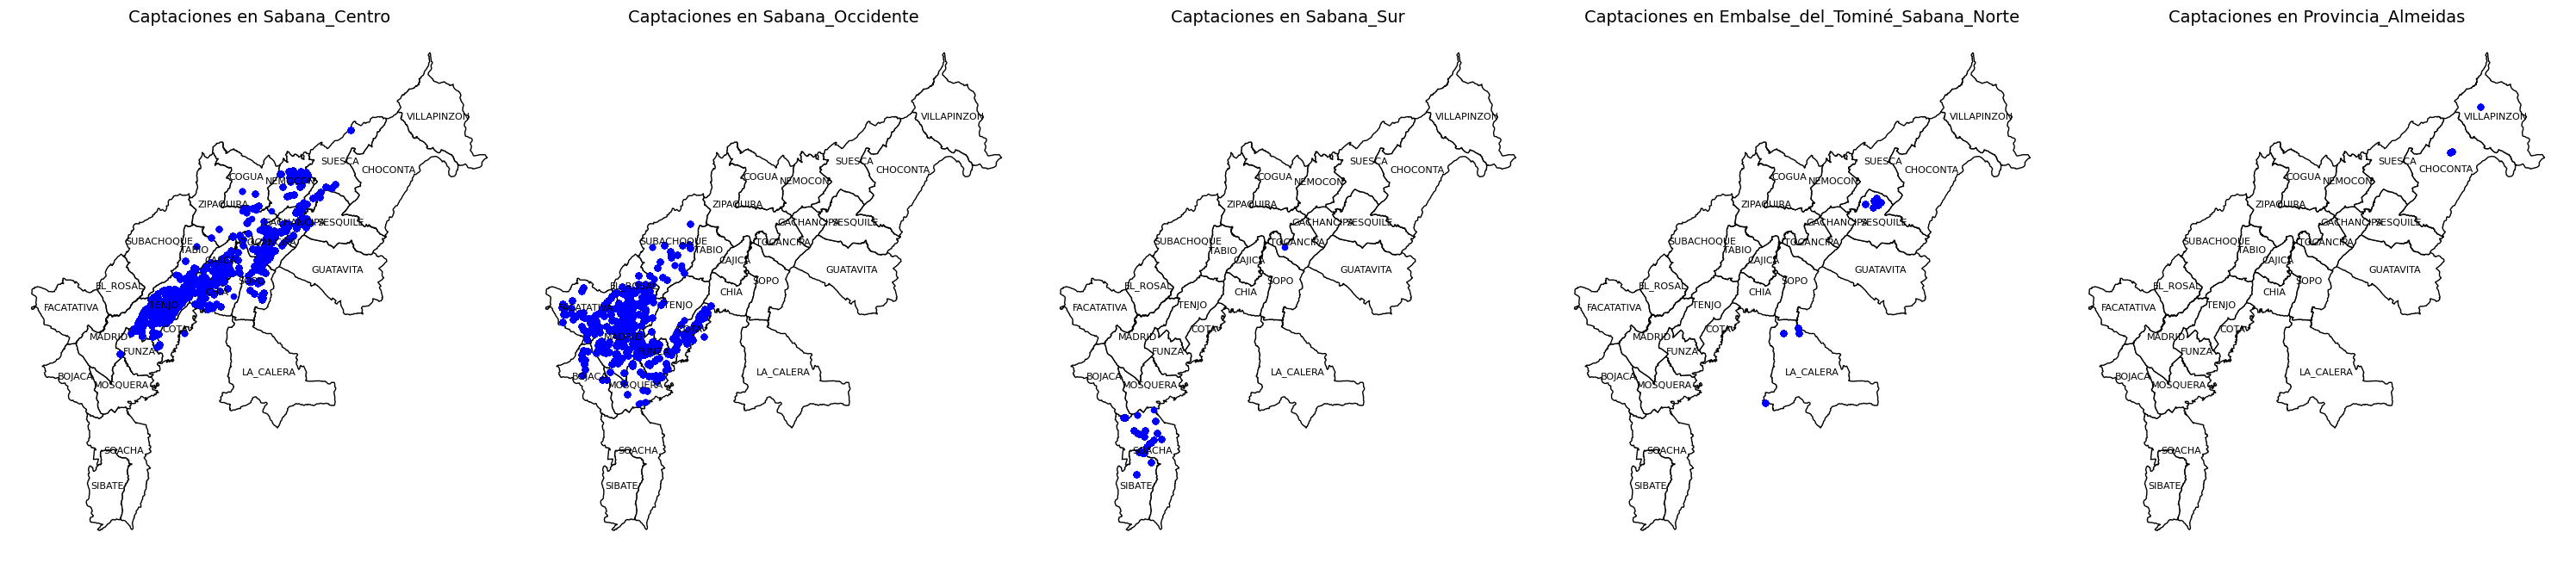

In [24]:
graficar_captaciones_por_region(sabana_bogota, df)

In [25]:
import matplotlib.pyplot as plt
import math

def graficar_captaciones_por_unidad_geologica(sabana_bogota, df, unidad_col="UNIDAD GEOLOGICA"):
    unidades = df[unidad_col].dropna().unique()
    n = len(unidades)

    # --- Calcular grid (máx 3 mapas por fila) ---
    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 6*nrows))
    axes = axes.flatten()

    for ax, unidad in zip(axes, unidades):
        puntos_unidad = df[df[unidad_col] == unidad]

        # Mapa base
        sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

        # Solo ploteamos si hay puntos
        if not puntos_unidad.empty:
            puntos_unidad.plot(ax=ax, color="blue", markersize=20, label="Captaciones")

        # Etiquetas de municipios
        for idx, row in sabana_bogota.iterrows():
            x, y = row.geometry.centroid.x, row.geometry.centroid.y
            ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

        ax.set_title(f"{unidad}", fontsize=12)
        ax.set_aspect("equal")   # 🔑 fuerza aspecto válido
        ax.axis("off")

    # Si sobran ejes (cuando n no llena toda la grid)
    for ax in axes[n:]:
        ax.remove()

    plt.tight_layout()
    plt.show()


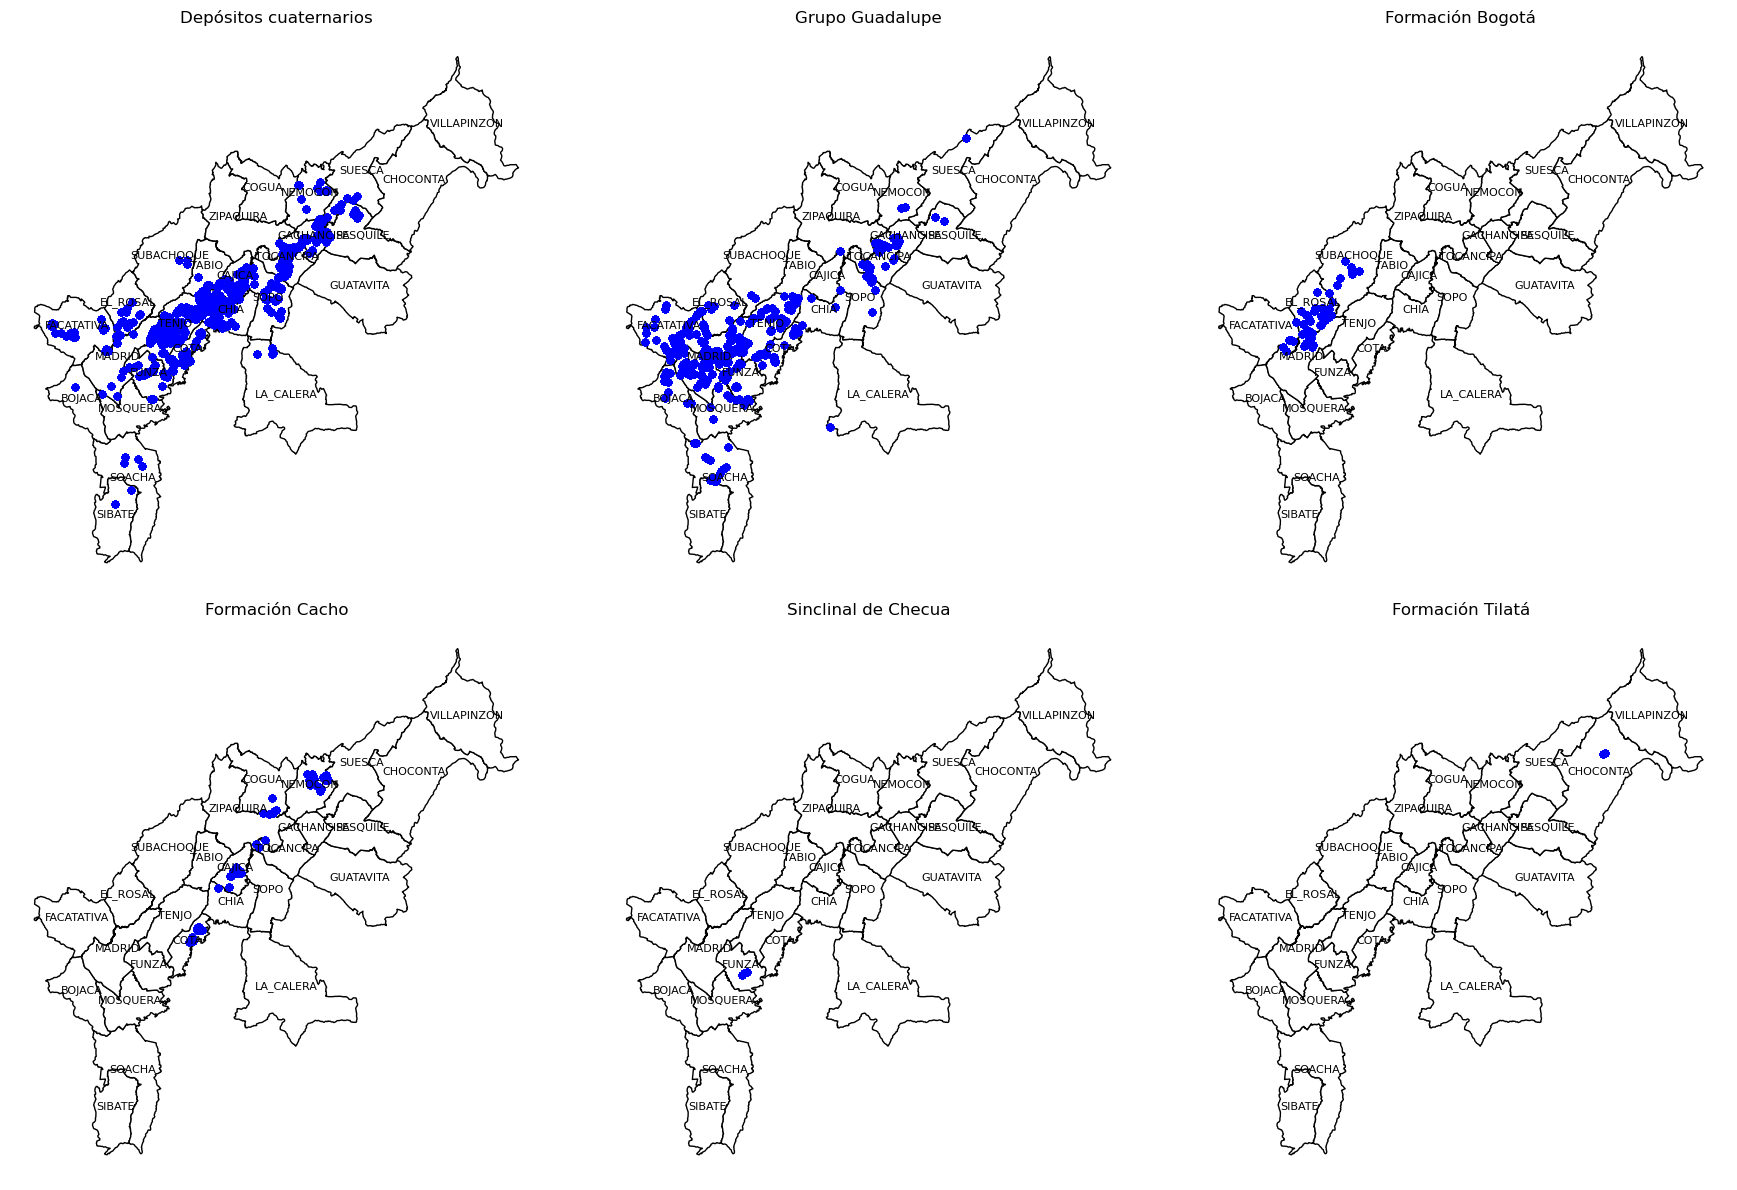

In [26]:
graficar_captaciones_por_unidad_geologica(sabana_bogota, df)

In [27]:
import matplotlib.pyplot as plt

def graficar_por_estructura(puntos_gdf, sabana_bogota):
    """
    Grafica los puntos de captación coloreados por categoría de ESTRUCTURA_GEOLOGICA,
    junto con el mapa base de municipios de la sabana.
    
    Parámetros:
    - puntos_gdf: GeoDataFrame con los puntos de captación (incluye columna ESTRUCTURA_GEOLOGICA).
    - sabana_bogota: GeoDataFrame con los polígonos de municipios de la sabana.
    """
    
    # Crear la figura
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Dibujar el mapa base
    sabana_bogota.plot(ax=ax, color="white", edgecolor="black", alpha=0.5)
    
    # Dibujar los puntos coloreados por estructura
    puntos_gdf.plot(
        ax=ax,
        column="ESTRUCTURA_GEOLOGICA",
        categorical=True,
        legend=True,
        markersize=30,
        cmap="tab20"
    )
    
    # Etiquetar municipios en el mapa
    for idx, row in sabana_bogota.iterrows():
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="blue")
    
    # Título
    ax.set_title("Puntos de captación por ESTRUCTURA_GEOLOGICA", fontsize=14)
    plt.show()


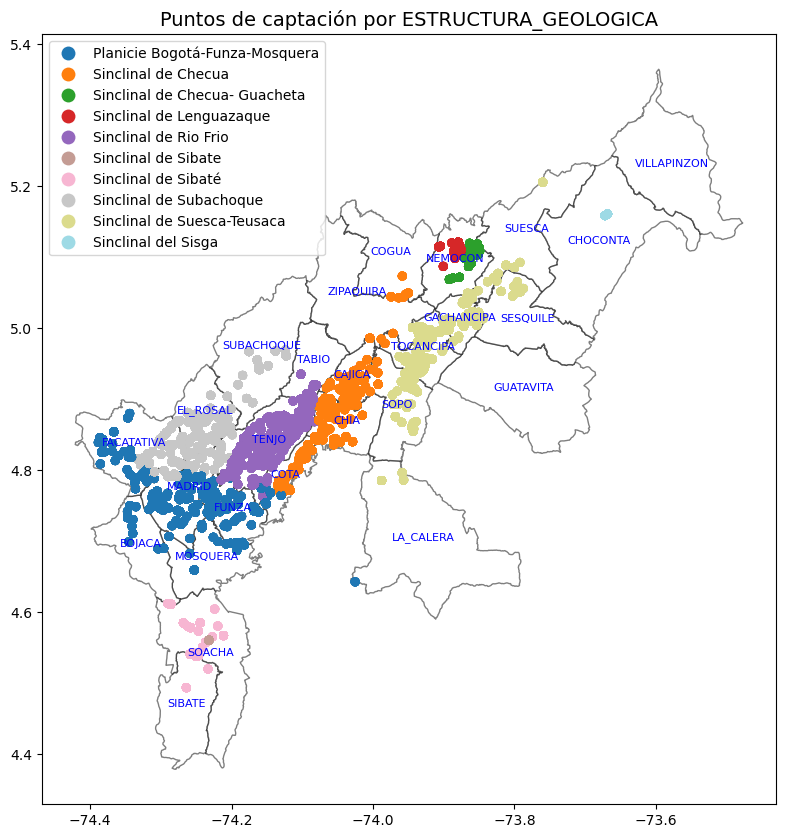

In [28]:
graficar_por_estructura(df,sabana_bogota)

In [29]:
def graficar_por_tipouso(puntos_gdf, sabana_bogota):
    """
    Grafica los puntos de captación coloreados por categoría de TIPOUSO,
    junto con el mapa base de municipios de la sabana.
    
    Parámetros:
    - puntos_gdf: GeoDataFrame con los puntos de captación (incluye columna TIPOUSO).
    - sabana_bogota: GeoDataFrame con los polígonos de municipios de la sabana.
    """
    
    # Crear la figura
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Dibujar el mapa base
    sabana_bogota.plot(ax=ax, color="white", edgecolor="black", alpha=0.5)
    
    # Dibujar los puntos coloreados por TIPOUSO
    puntos_gdf.plot(
        ax=ax,
        column="TIPOUSO",
        categorical=True,
        legend=True,
        markersize=30,
        cmap="tab10"   # paleta distinta a la de estructuras
    )
    
    # Etiquetar municipios en el mapa
    for idx, row in sabana_bogota.iterrows():
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="blue")
    
    # Título
    ax.set_title("Puntos de captación por TIPOUSO", fontsize=14)
    plt.show()

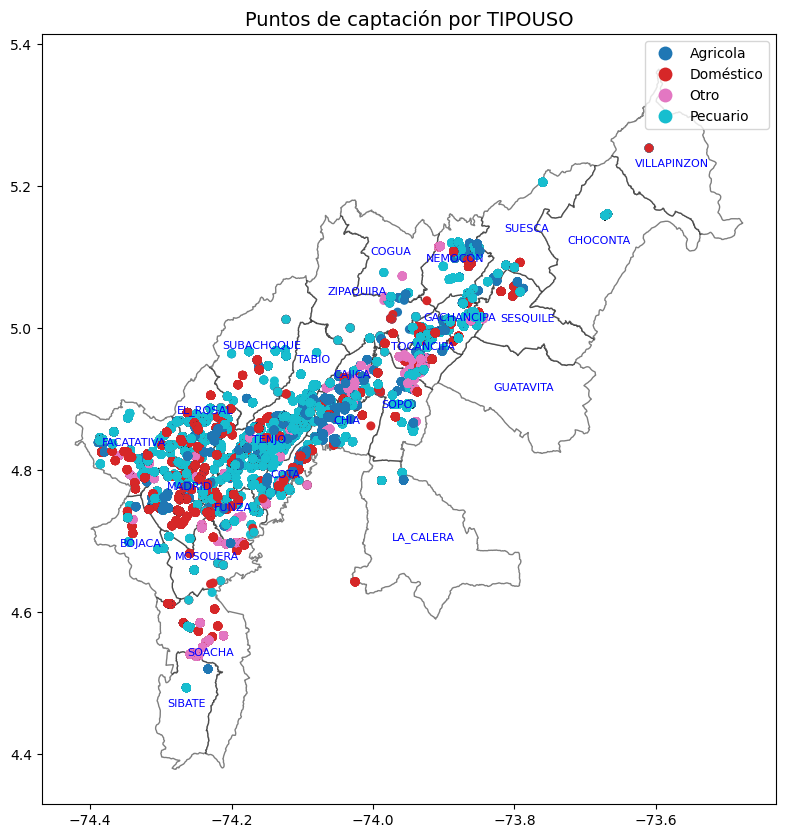

In [30]:
graficar_por_tipouso(df, sabana_bogota)

# ANALISIS Variables hidrogeológicas y de recurso hídrico

In [31]:
df.dtypes

POZO_ASIGNADO_AL_PUNTO                   object
DISTANCIA_M_AL_POZO_ASIGNADO            float64
IDUSUARIO                                 int32
IDPREDIO                                  int32
IDCONCESION                               int32
IDCAPTACION                               int32
IDUSO                                     int32
MUNICIPIO_PUNTO_CAPTACION                object
OFERTA_HIDRICA_TOTAL                    float64
OFERTA_DISPONIBLE                       float64
ESTADO_CAPTACION                         object
CAUDAL_CONCESIONADO                     float64
CAUDAL_ASIGNADO                         float64
TIPOUSO                                  object
DESCRIPCION_ACCESO                       object
NOMBREFUENTE                             object
TIPOFUENTECAPTACION                      object
SUBZONA                                  object
CONTINUIDAD                              object
GRADOS_LAT                                int32
MINUTOS_LAT                             

In [32]:
# Seleccionamos solo las columnas numéricas
df_numerico = df.select_dtypes(include='number')


In [33]:
df_numerico.drop(columns=['IDUSUARIO', 'IDPREDIO', 'IDCONCESION', 'IDUSO','GRADOS_LAT', 'MINUTOS_LAT',
                          'SEGUNDOS_LAT', 'GRADOS_LONG', 'MINUTOS_LONG', 'SEGUNDOS_LONG','CODIGOCIUU', 'FECHA_INICIO', 
                          'FECHA_FIN', 'LAT_DD_calc','LONG_DD_calc','NORTE','ESTE','COMPLETITUD_SERIE'],inplace=True)

In [34]:
df_numerico.columns

Index(['DISTANCIA_M_AL_POZO_ASIGNADO', 'IDCAPTACION', 'OFERTA_HIDRICA_TOTAL',
       'OFERTA_DISPONIBLE', 'CAUDAL_CONCESIONADO', 'CAUDAL_ASIGNADO',
       'RATIO_ASIGNADO_DISPONIBLE', 'RATIO_CONCESIONADO_TOTAL',
       'RATIO_CONCESIONADO_DISPONIBLE', 'RATIO_ASIGNADO_CONCESIONADO',
       'VALOR_NIVEL_ESTATICO', 'TENDENCIA_LINEAL_M_AÑO',
       'PROFUNDIDAD_MEDIA_RECIENTE_M', 'VARIABILIDAD_INTERANUAL_M',
       'TOTAL_MEDICIONES', 'RANGO_ANIOS'],
      dtype='object')

In [35]:
df_unique = df.drop_duplicates(subset="IDCAPTACION")


In [36]:
df_unique.loc[df_unique["IDCAPTACION"] == 7032698, "CAUDAL_CONCESIONADO"] = 6.48


In [37]:
var = "CAUDAL_ASIGNADO"
series = df_unique[var]

# Analisis univariado variable Caudal Asignado

In [38]:
print(series.describe())
print("Valores nulos:", series.isna().sum())
print("Valores negativos:", (series.dropna() < 0).sum())


count    1129.000000
mean        1.450894
std         4.926263
min         0.000000
25%         0.021000
50%         0.200000
75%         0.960000
max        64.000000
Name: CAUDAL_ASIGNADO, dtype: float64
Valores nulos: 0
Valores negativos: 0


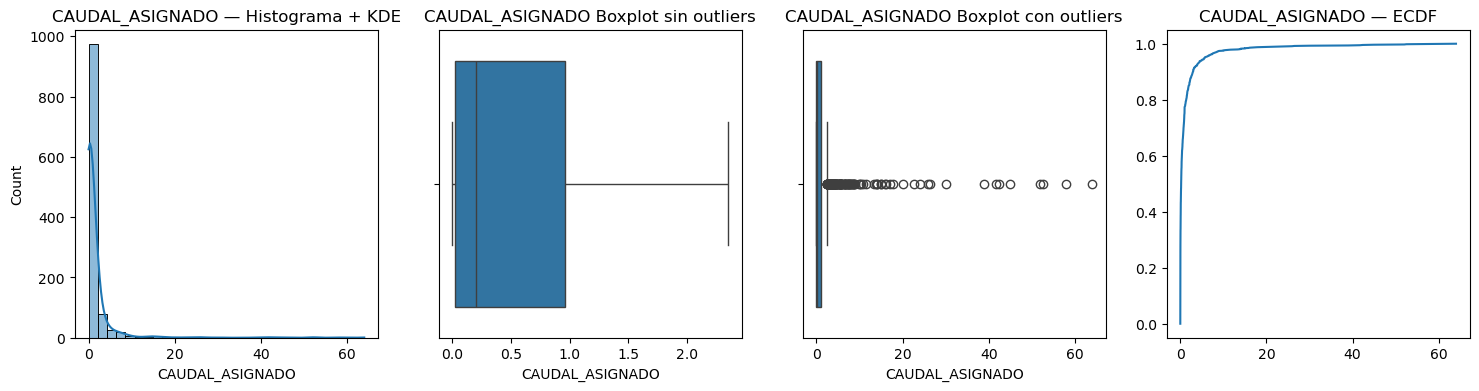

In [39]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Histograma + KDE
sns.histplot(series.dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f"{var} — Histograma + KDE")

# Boxplot sin outliers
sns.boxplot(x=series.dropna(),showfliers=False, ax=axes[1])
axes[1].set_title(f"{var} Boxplot sin outliers")

# Boxplot con outliers
sns.boxplot(x=series.dropna(), ax=axes[2])
axes[2].set_title(f"{var} Boxplot con outliers")


# ECDF (función de distribución acumulada empírica)
s = series.dropna()
x = np.sort(s)
y = np.arange(1, len(x)+1) / len(x)
axes[3].plot(x, y)
axes[3].set_title(f"{var} — ECDF")

plt.show()


In [40]:
Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = series[(series < lower) | (series > upper)]
print(f"Outliers por IQR: {len(outliers_iqr)}")


Outliers por IQR: 139


In [41]:
median = series.median()
mad = (np.abs(series - median)).median()
mz = 0.6745 * (series - median) / mad
outliers_mz = series[np.abs(mz) > 3.5]

print(f"Outliers por Modified Z-Score: {len(outliers_mz)}")


Outliers por Modified Z-Score: 244


# 📊 Resultados que viste

Histograma

Se concentra muchísimo en valores cercanos a 0 → la mayoría de captaciones tienen caudales asignados muy bajos.

Pocos pozos tienen caudales altos → por eso la cola larga hacia la derecha.

Boxplot

La “cajita diminuta” representa que el 50% central de los datos (entre p25=0.021 y p75=0.960) está en un rango muy reducido.

Todo lo que sale a la derecha de 0.960 ya son “potenciales outliers” → muchos puntos aislados.

ECDF (Empirical Cumulative Distribution Function)

Es la curva de acumulación: en el eje X tienes valores de caudal, en el eje Y la proporción acumulada de observaciones.

Ejemplo: si en X=1, Y=0.8 → significa que el 80% de las captaciones tienen caudales ≤ 1.

Te ayuda a ver qué tan concentrados están los datos en los valores pequeños.

🚨 Outliers

IQR → 139 outliers
Detectados porque están fuera de 1.5 veces el rango intercuartílico.
Es un criterio sensible cuando la distribución es muy sesgada.

Modified Z-Score → 244 outliers
Detectados porque se alejan demasiado de la mediana, ajustado con MAD (median absolute deviation).
Este método es más robusto para distribuciones sesgadas.
👉 Significa que 244 captaciones (de 1129) tienen caudales tan grandes respecto a la mediana (0.2) que se consideran atípicos.

🔎 Interpretación práctica

La mayoría de los pozos tienen asignaciones bajísimas (cercanas a 0–1).

Hay un subconjunto considerable (≈20%) con caudales mucho mayores (hasta 64).

Esos 244 no son necesariamente errores: pueden ser captaciones industriales, municipales o de gran escala, pero hidrogeológicamente son atípicas frente al resto.

👉 En resumen:

El Modified Z-Score = 244 significa que 244 pozos tienen caudales que se salen de lo “esperado” según la mediana de todos los demás.

In [42]:

# --- 1. Filtrar valores únicos de IDCAPTACION ---
df_unique = df.drop_duplicates(subset="IDCAPTACION")

# --- 2. Detectar outliers con Modified Z-Score ---
s = df_unique["CAUDAL_ASIGNADO"].dropna()
median = s.median()
mad = (np.abs(s - median)).median()
mz = 0.6745 * (s - median) / mad
outliers_mask = np.abs(mz) > 3.5

outliers = df_unique.loc[outliers_mask]

print(f"Total outliers detectados: {outliers.shape[0]}")

# --- 3. Relacionar con variables categóricas ---
print("\nDistribución por TIPOUSO:")
print(outliers["TIPOUSO"].value_counts())

print("\nDistribución por REGION:")
print(outliers["REGION"].value_counts())

print("\nDistribución por ESTRUCTURA_GEOLOGICA:")
print(outliers["ESTRUCTURA_GEOLOGICA"].value_counts())

# --- 4. (opcional) Comparar contra toda la población para ver proporciones ---
print("\nProporción de outliers vs total por TIPOUSO:")
print(outliers["TIPOUSO"].value_counts(normalize=True) * 100)


Total outliers detectados: 244

Distribución por TIPOUSO:
TIPOUSO
Agricola     182
Doméstico     34
Otro          22
Pecuario       6
Name: count, dtype: int64

Distribución por REGION:
REGION
Sabana_Occidente                   124
Sabana_Centro                      105
Sabana_Sur                          10
Embalse_del_Tominé_Sabana_Norte      4
Provincia_Almeidas                   1
Name: count, dtype: int64

Distribución por ESTRUCTURA_GEOLOGICA:
ESTRUCTURA_GEOLOGICA
Planicie Bogotá-Funza-Mosquera    80
Sinclinal de Suesca-Teusaca       53
Sinclinal de Subachoque           32
Sinclinal de Checua               30
Sinclinal de Rio Frio             21
Sinclinal de Sibaté                8
Sinclinal de Checua- Guacheta      5
Sinclinal de Lenguazaque           2
Sinclinal de Sibate                1
Sinclinal del Sisga                1
Name: count, dtype: int64

Proporción de outliers vs total por TIPOUSO:
TIPOUSO
Agricola     74.590164
Doméstico    13.934426
Otro          9.016393
Pecuar

Total outliers detectados: 244


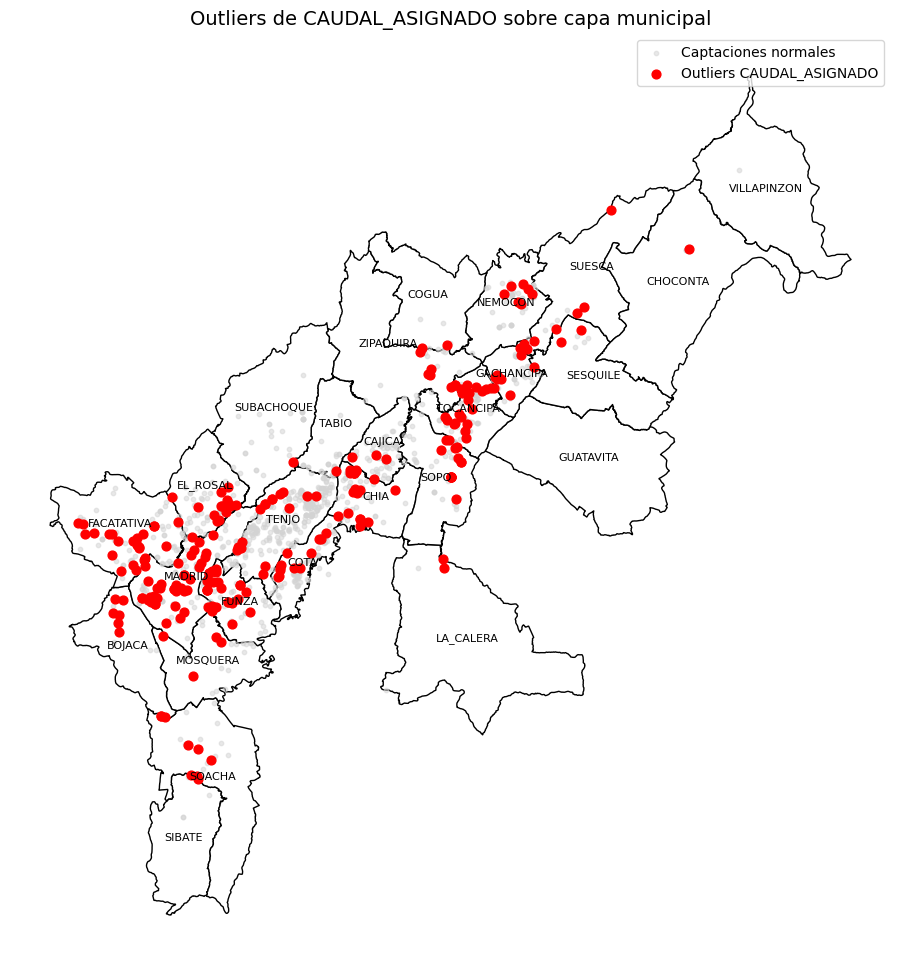

In [43]:

# --- 1. Filtrar valores únicos de IDCAPTACION ---
df_unique = df.drop_duplicates(subset="IDCAPTACION")

# --- 2. Detectar outliers con Modified Z-Score ---
s = df_unique["CAUDAL_ASIGNADO"].dropna()
median = s.median()
mad = (np.abs(s - median)).median()
mz = 0.6745 * (s - median) / mad
outliers_mask = np.abs(mz) > 3.5

outliers = df_unique.loc[outliers_mask]

print(f"Total outliers detectados: {outliers.shape[0]}")

# --- 3. Graficar mapa ---
fig, ax = plt.subplots(figsize=(12,12))

# Capa base (municipios)
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Todos los puntos de captación (gris claro para contexto)
df_unique.plot(ax=ax, color="lightgrey", markersize=10, alpha=0.5, label="Captaciones normales")

# Outliers resaltados
outliers.plot(ax=ax, color="red", markersize=40, marker="o", label="Outliers CAUDAL_ASIGNADO")

# Etiquetas de municipios
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

ax.set_title("Outliers de CAUDAL_ASIGNADO sobre capa municipal", fontsize=14)
ax.axis("off")
ax.legend()

plt.show()


# Analisis univariado variable Oferta disponible.



In [44]:
var1 = "OFERTA_DISPONIBLE"
series1 = df_unique[var1]

In [45]:
print(series1.describe())
print("Valores nulos:", series1.isna().sum())
print("Valores negativos:", (series1.dropna() < 0).sum())


count    1127.000000
mean        0.040212
std         0.592511
min         0.000000
25%         0.000685
50%         0.001500
75%         0.003750
max        16.500000
Name: OFERTA_DISPONIBLE, dtype: float64
Valores nulos: 2
Valores negativos: 0


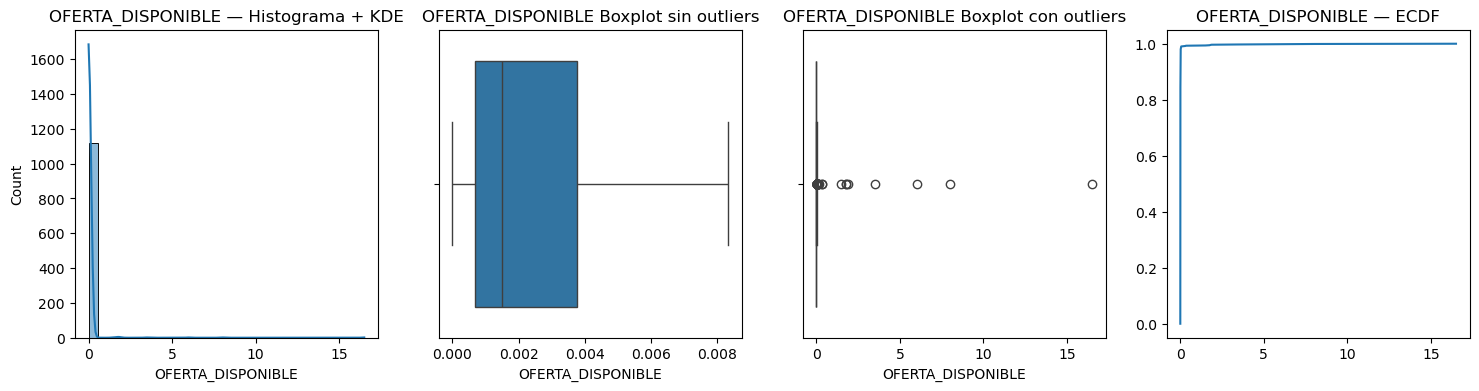

In [46]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Histograma + KDE
sns.histplot(series1.dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f"{var1} — Histograma + KDE")

# Boxplot sin outliers
sns.boxplot(x=series1.dropna(),showfliers=False, ax=axes[1])
axes[1].set_title(f"{var1} Boxplot sin outliers")

# Boxplot con outliers
sns.boxplot(x=series1.dropna(), ax=axes[2])
axes[2].set_title(f"{var1} Boxplot con outliers")


# ECDF (función de distribución acumulada empírica)
s = series1.dropna()
x = np.sort(s)
y = np.arange(1, len(x)+1) / len(x)
axes[3].plot(x, y)
axes[3].set_title(f"{var1} — ECDF")

plt.show()

In [47]:
Q1 = series1.quantile(0.25)
Q3 = series1.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = series1[(series1 < lower) | (series1 > upper)]
print(f"Outliers por IQR: {len(outliers_iqr)}")

Outliers por IQR: 109


In [48]:
median = series1.median()
mad = (np.abs(series1 - median)).median()
mz = 0.6745 * (series1 - median) / mad
outliers_mz = series1[np.abs(mz) > 3.5]

print(f"Outliers por Modified Z-Score: {len(outliers_mz)}")


Outliers por Modified Z-Score: 163


# 📊 Resumen de lo que ves

Media (0.04) muy baja comparada con el máx (16.5) → fuerte asimetría.

Mediana (0.0015) ≪ media → la mayoría de valores son muy pequeños, pero unos pocos valores enormes jalan la media hacia arriba.

Boxplot: la “caja diminuta” indica que el 50% central de los datos está extremadamente concentrado en valores muy bajos.

Outliers por IQR (109) y Z-Score (163): confirman que hay un subconjunto no despreciable de puntos que son atípicos extremos.

📈 Interpretación gráfica

Histograma: la gran barra inicial (casi todos en 0–0.01) confirma que la mayoría de captaciones apenas tienen oferta disponible.

La “línea delgada” hacia 16.5 muestra los casos poco frecuentes de oferta alta.

ECDF en forma de L: esto es típico cuando >90% de los datos están cerca de 0.

Ejemplo: si el 90% de captaciones tienen oferta <0.01, la curva sube casi vertical al inicio y luego se aplana.

🔎 Cómo interpretar los outliers

109 (IQR) – 163 (Z-Score): entre el 10% y 15% de tus captaciones tienen oferta disponible mucho mayor que el resto.

Estos casos son anómalos estadísticamente, pero pueden ser muy relevantes hidrogeológicamente:

Captaciones en acuíferos más productivos.

Regiones donde el recurso aún no está tan presionado.

O simplemente errores de carga de datos.

In [49]:

# Calcular IQR
Q1 = df_unique["OFERTA_DISPONIBLE"].quantile(0.25)
Q3 = df_unique["OFERTA_DISPONIBLE"].quantile(0.75)
IQR = Q3 - Q1

# Rango de no-outliers
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Etiquetar registros
df_unique["OUTLIER_OFERTA"] = np.where(
    (df_unique["OFERTA_DISPONIBLE"] < limite_inf) | (df_unique["OFERTA_DISPONIBLE"] > limite_sup),
    "Outlier", "No Outlier"
)

df_unique["OUTLIER_OFERTA"].value_counts()


C:\Users\Andres\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


OUTLIER_OFERTA
No Outlier    1020
Outlier        109
Name: count, dtype: int64

In [50]:
# Cruzar con tipo de uso
uso_vs_outlier = pd.crosstab(df_unique["TIPOUSO"], df_unique["OUTLIER_OFERTA"])
uso_vs_outlier

OUTLIER_OFERTA  No Outlier  Outlier
TIPOUSO                            
Agricola               628       64
Doméstico              219       30
Otro                    47       10
Pecuario               126        5

In [51]:
# cruzar con región.
region_vs_outlier = pd.crosstab(df_unique["REGION"], df_unique["OUTLIER_OFERTA"])
region_vs_outlier


OUTLIER_OFERTA                   No Outlier  Outlier
REGION                                              
Embalse_del_Tominé_Sabana_Norte          10        1
Provincia_Almeidas                        5        0
Sabana_Centro                           599       43
Sabana_Occidente                        384       60
Sabana_Sur                               22        5

In [52]:
# cruzar estructura_geologica
geo_vs_outlier = pd.crosstab(df_unique["ESTRUCTURA_GEOLOGICA"], df_unique["OUTLIER_OFERTA"])
geo_vs_outlier

OUTLIER_OFERTA                  No Outlier  Outlier
ESTRUCTURA_GEOLOGICA                               
Planicie Bogotá-Funza-Mosquera         148       43
Sinclinal de Checua                    185       10
Sinclinal de Checua- Guacheta           25        2
Sinclinal de Lenguazaque                14        0
Sinclinal de Rio Frio                  264       14
Sinclinal de Sibate                      0        1
Sinclinal de Sibaté                     19        4
Sinclinal de Subachoque                146       12
Sinclinal de Suesca-Teusaca            150       22
Sinclinal del Sisga                      4        0

In [53]:
# Mapa diferenciador de outliers de oferta disponible (limite inferior- limite superior)
Q1 = df_unique["OFERTA_DISPONIBLE"].quantile(0.25)
Q3 = df_unique["OFERTA_DISPONIBLE"].quantile(0.75)
IQR = Q3 - Q1

limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

# Clasificar outliers
df_unique["OUTLIER_OFERTA"] = "Normal"
df_unique.loc[df_unique["OFERTA_DISPONIBLE"] < limite_inf, "OUTLIER_OFERTA"] = "Bajo"
df_unique.loc[df_unique["OFERTA_DISPONIBLE"] > limite_sup, "OUTLIER_OFERTA"] = "Alto"

df_unique["OUTLIER_OFERTA"].value_counts()


C:\Users\Andres\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


OUTLIER_OFERTA
Normal    1020
Alto       109
Name: count, dtype: int64

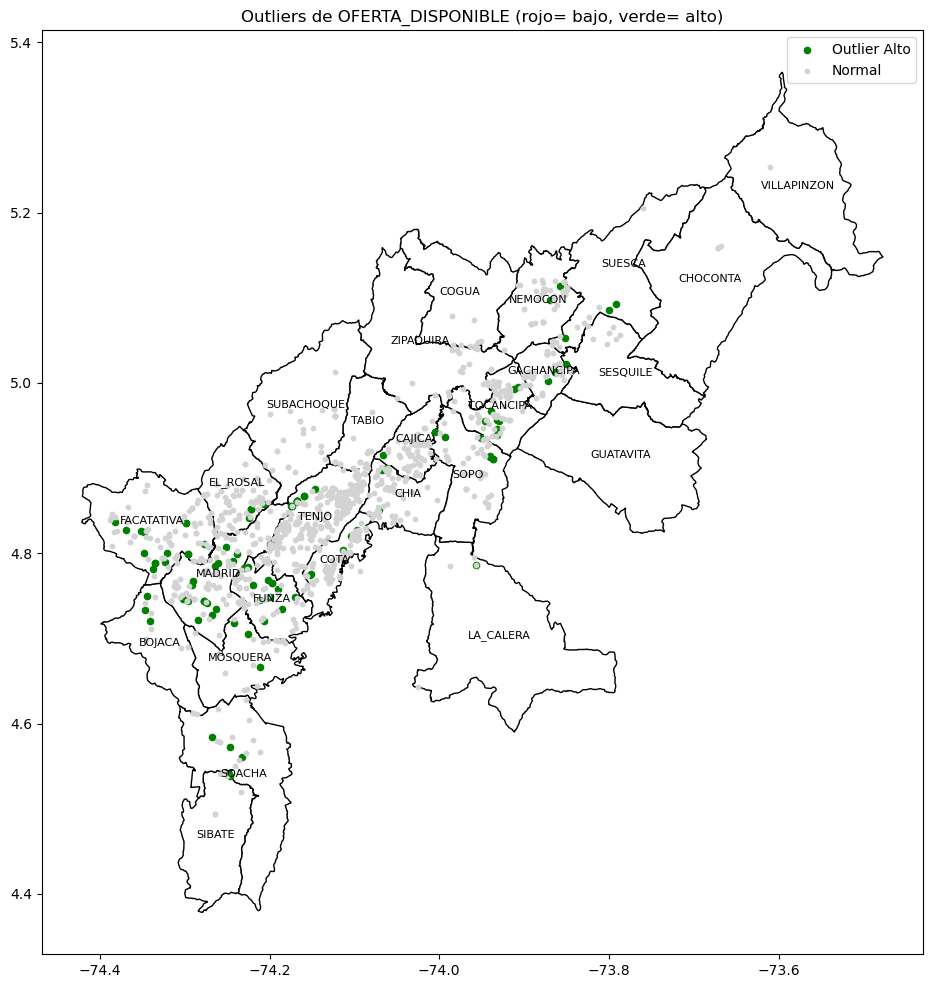

In [54]:

fig, ax = plt.subplots(figsize=(12,12))

# Mapa base
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

# Outliers altos (verde)
df_unique[df_unique["OUTLIER_OFERTA"]=="Alto"].plot(
    ax=ax, color="green", markersize=20, label="Outlier Alto"
)

# Normales (gris claro)
df_unique[df_unique["OUTLIER_OFERTA"]=="Normal"].plot(
    ax=ax, color="lightgray", markersize=10, label="Normal"
)

# Etiquetas de municipios
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

plt.legend()
plt.title("Outliers de OFERTA_DISPONIBLE (rojo= bajo, verde= alto)")
plt.show()


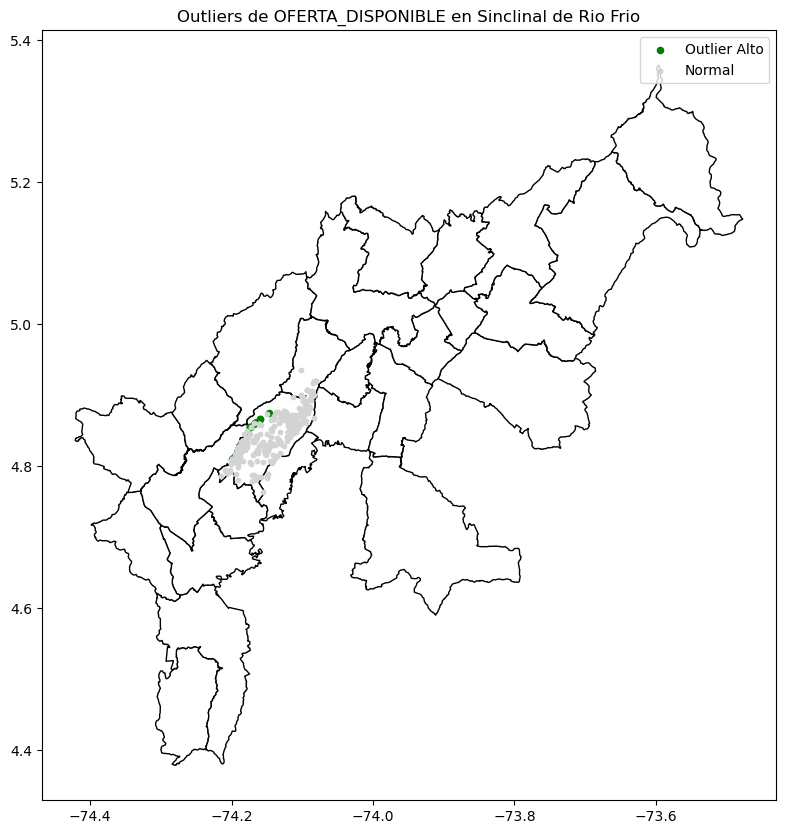

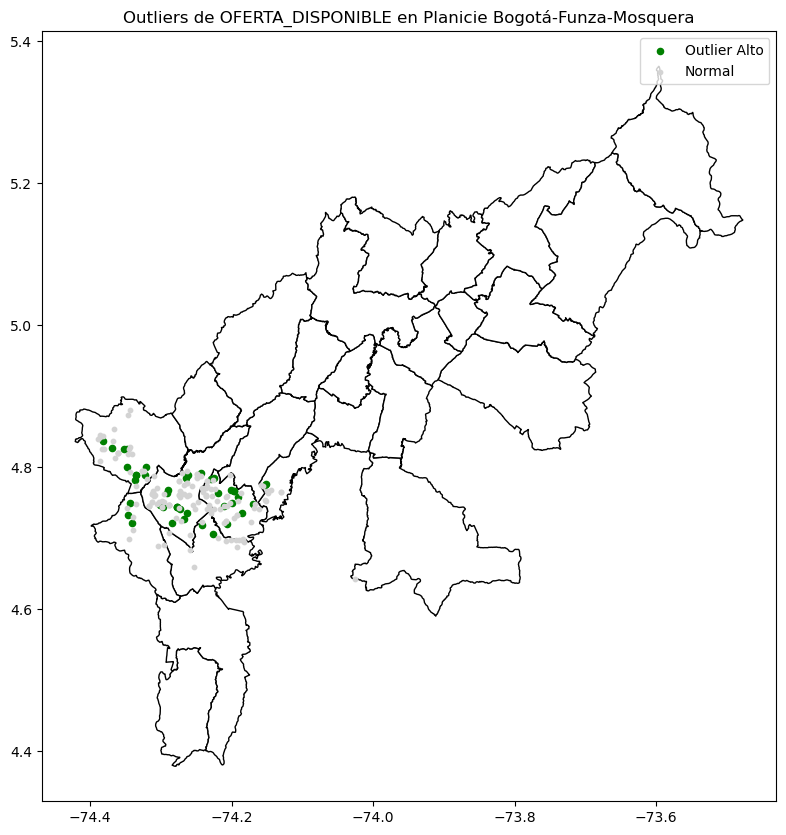

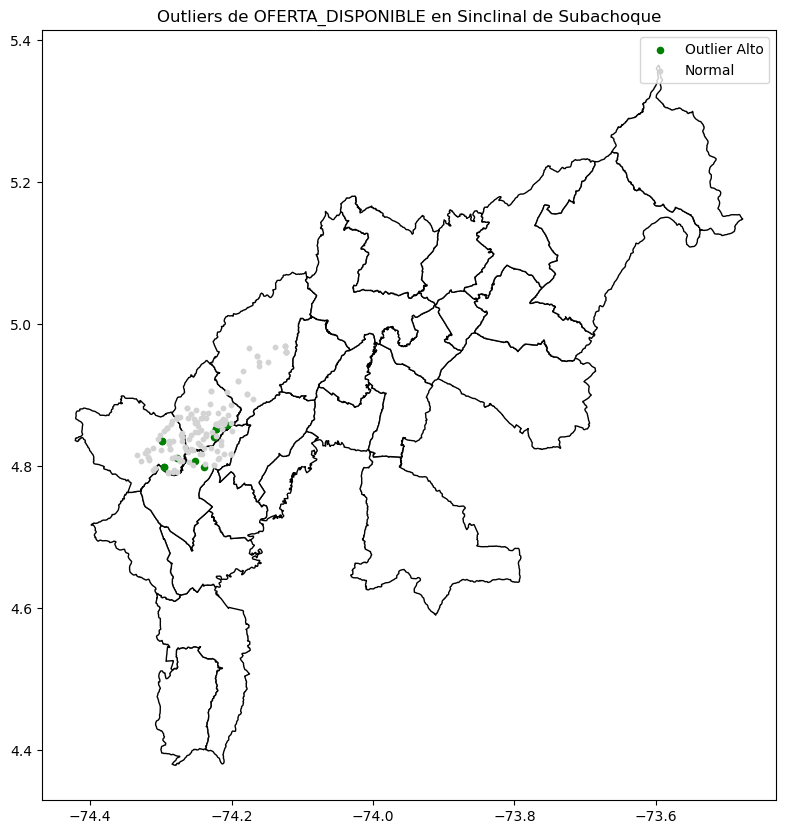

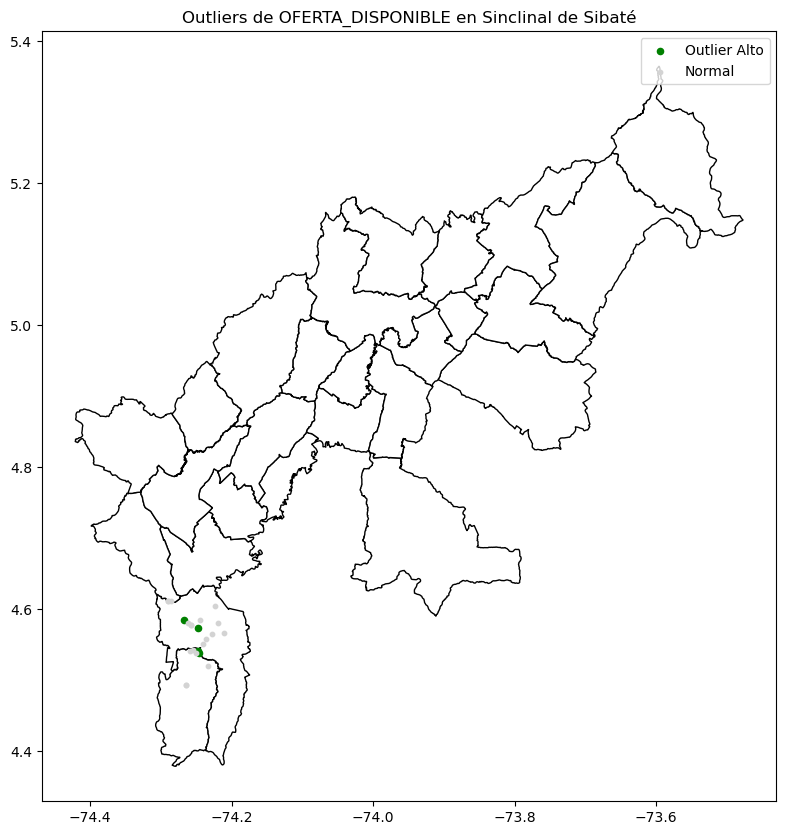

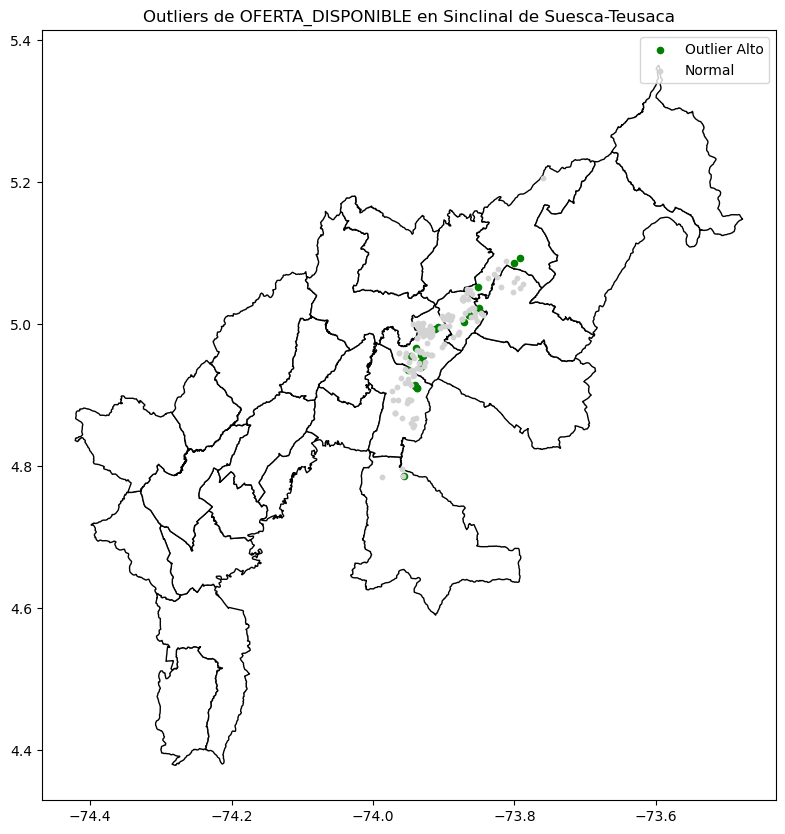

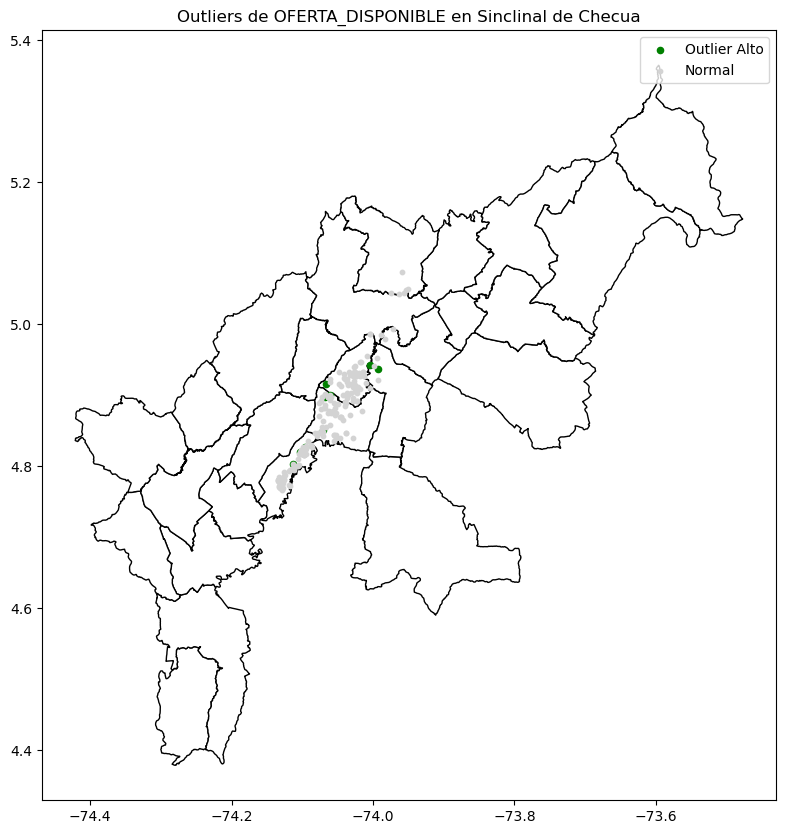

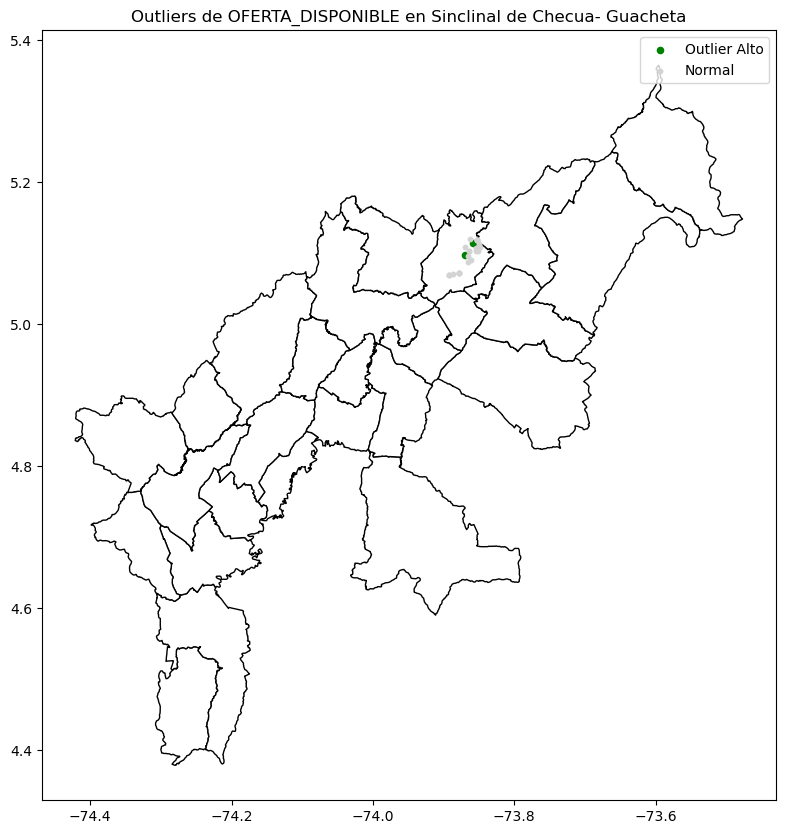

ValueError: aspect must be finite and positive 

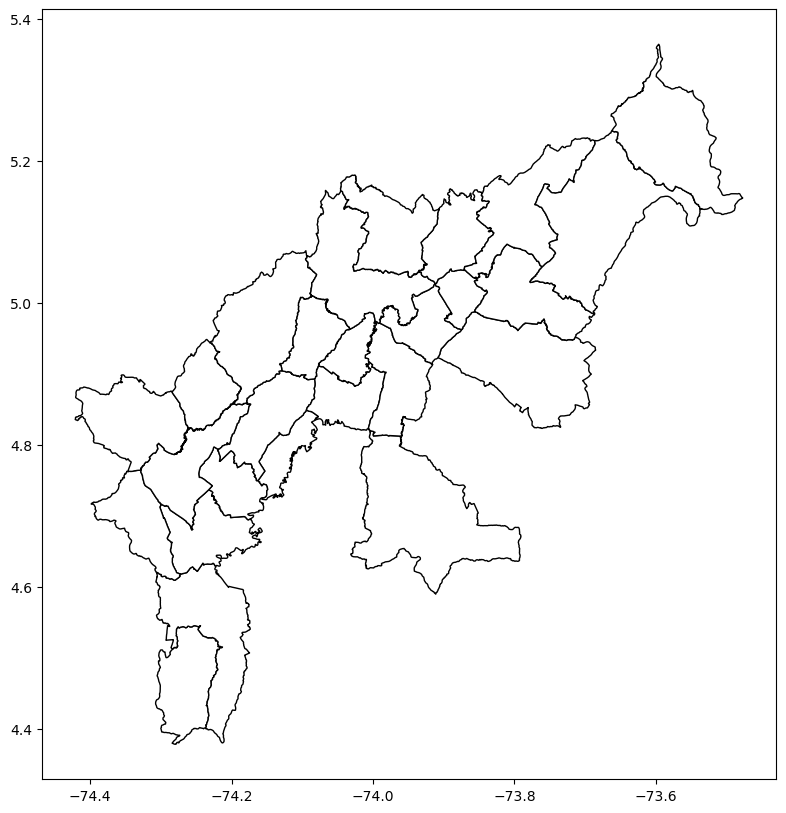

In [55]:
estructuras = df_unique["ESTRUCTURA_GEOLOGICA"].dropna().unique()

for estructura in estructuras:
    subset = df_unique[df_unique["ESTRUCTURA_GEOLOGICA"] == estructura]

    fig, ax = plt.subplots(figsize=(10,10))
    sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

    subset[subset["OUTLIER_OFERTA"]=="Alto"].plot(
        ax=ax, color="green", markersize=20, label="Outlier Alto"
    )
    subset[subset["OUTLIER_OFERTA"]=="Normal"].plot(
        ax=ax, color="lightgray", markersize=10, label="Normal"
    )

    plt.legend()
    plt.title(f"Outliers de OFERTA_DISPONIBLE en {estructura}")
    plt.show()


In [56]:
df_unique.columns

Index(['POZO_ASIGNADO_AL_PUNTO', 'DISTANCIA_M_AL_POZO_ASIGNADO', 'IDUSUARIO',
       'IDPREDIO', 'IDCONCESION', 'IDCAPTACION', 'IDUSO',
       'MUNICIPIO_PUNTO_CAPTACION', 'OFERTA_HIDRICA_TOTAL',
       'OFERTA_DISPONIBLE', 'ESTADO_CAPTACION', 'CAUDAL_CONCESIONADO',
       'CAUDAL_ASIGNADO', 'TIPOUSO', 'DESCRIPCION_ACCESO', 'NOMBREFUENTE',
       'TIPOFUENTECAPTACION', 'SUBZONA', 'CONTINUIDAD', 'GRADOS_LAT',
       'MINUTOS_LAT', 'SEGUNDOS_LAT', 'GRADOS_LONG', 'MINUTOS_LONG',
       'SEGUNDOS_LONG', 'CODIGOCIUU', 'DESCRIPCIONCIUU', 'FECHA_INICIO',
       'FECHA_FIN', 'LAT_DD_calc', 'LONG_DD_calc', 'RATIO_ASIGNADO_DISPONIBLE',
       'RATIO_CONCESIONADO_TOTAL', 'RATIO_CONCESIONADO_DISPONIBLE',
       'RATIO_ASIGNADO_CONCESIONADO', 'RIESGO_ASIG_DISP', 'REGION',
       'GEOMETRIA_PUNTO_CAPTACION', 'ID_POZO_MONITOREO',
       'MUNICIPIO_POZO_MONITOREO', 'CUENCA_HIDROGRAFICA', 'NORTE', 'ESTE',
       'ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA', 'VALOR_NIVEL_ESTATICO',
       'FECHA_MEDICION_

# Analisis univariado variable Nivel Estatico

In [57]:
var2 = "VALOR_NIVEL_ESTATICO"
series2 = df_unique[var2]


In [58]:
print(series2.describe())
print("Valores nulos:", series2.isna().sum())
print("Valores negativos:", (series2.dropna() < 0).sum())


count    395.000000
mean      28.340810
std       18.349093
min        0.000000
25%       16.100000
50%       22.250000
75%       33.925000
max      109.840000
Name: VALOR_NIVEL_ESTATICO, dtype: float64
Valores nulos: 734
Valores negativos: 0


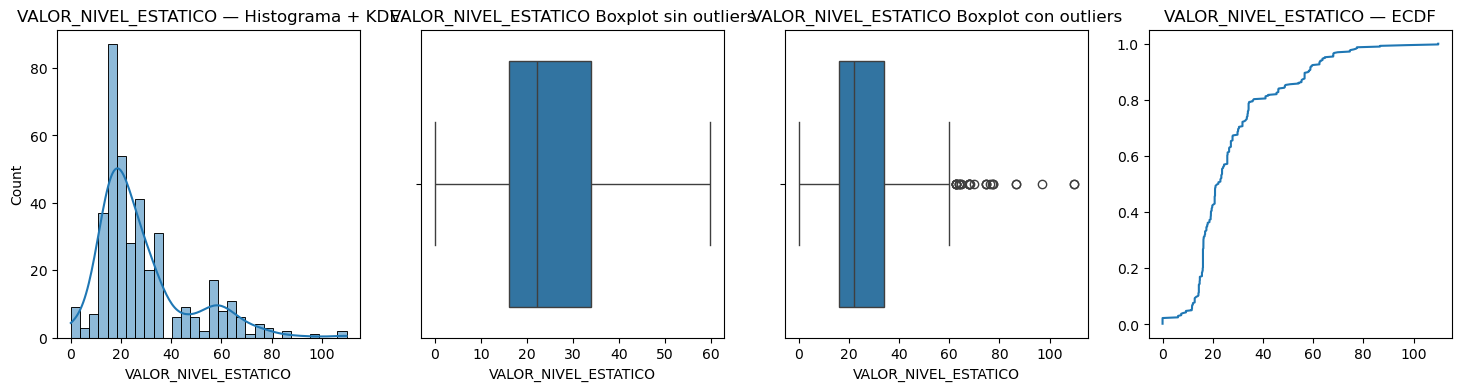

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Histograma + KDE
sns.histplot(series2.dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f"{var2} — Histograma + KDE")

# Boxplot sin outliers
sns.boxplot(x=series2.dropna(),showfliers=False, ax=axes[1])
axes[1].set_title(f"{var2} Boxplot sin outliers")

# Boxplot con outliers
sns.boxplot(x=series2.dropna(), ax=axes[2])
axes[2].set_title(f"{var2} Boxplot con outliers")


# ECDF (función de distribución acumulada empírica)
s = series2.dropna()
x = np.sort(s)
y = np.arange(1, len(x)+1) / len(x)
axes[3].plot(x, y)
axes[3].set_title(f"{var2} — ECDF")

plt.show()


In [60]:
Q1 = series2.quantile(0.25)
Q3 = series2.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = series2[(series2 < lower) | (series2 > upper)]
print(f"Outliers por IQR: {len(outliers_iqr)}")

Outliers por IQR: 30


In [61]:
median = series2.median()
mad = (np.abs(series2 - median)).median()
mz = 0.6745 * (series2 - median) / mad
outliers_mz = series2[np.abs(mz) > 3.5]

print(f"Outliers por Modified Z-Score: {len(outliers_mz)}")

Outliers por Modified Z-Score: 50


In [62]:
# Por unidad geológica
stats_unidad = df_unique.groupby("UNIDAD GEOLOGICA")["VALOR_NIVEL_ESTATICO"].describe()

# Por estructura geológica
stats_estructura = df_unique.groupby("ESTRUCTURA_GEOLOGICA")["VALOR_NIVEL_ESTATICO"].describe()

print("Resumen por Unidad Geológica:")
print(stats_unidad)

print("\nResumen por Estructura Geológica:")
print(stats_estructura)


Resumen por Unidad Geológica:
                        count       mean        std    min    25%    50%  \
UNIDAD GEOLOGICA                                                           
Depósitos cuaternarios  301.0  22.354120  12.493594   0.00  16.00  19.29   
Formación Bogotá         13.0  50.859231  16.759530  33.56  34.23  56.61   
Formación Cacho           3.0  23.796667   0.258908  23.60  23.65  23.70   
Formación Tilatá          0.0        NaN        NaN    NaN    NaN    NaN   
Grupo Guadalupe          78.0  47.865000  21.406025   7.43  31.84  46.12   
Sinclinal de Checua       0.0        NaN        NaN    NaN    NaN    NaN   

                           75%     max  
UNIDAD GEOLOGICA                        
Depósitos cuaternarios  25.920   86.66  
Formación Bogotá        62.500   74.62  
Formación Cacho         23.895   24.09  
Formación Tilatá           NaN     NaN  
Grupo Guadalupe         62.870  109.84  
Sinclinal de Checua        NaN     NaN  

Resumen por Estructura Geológica

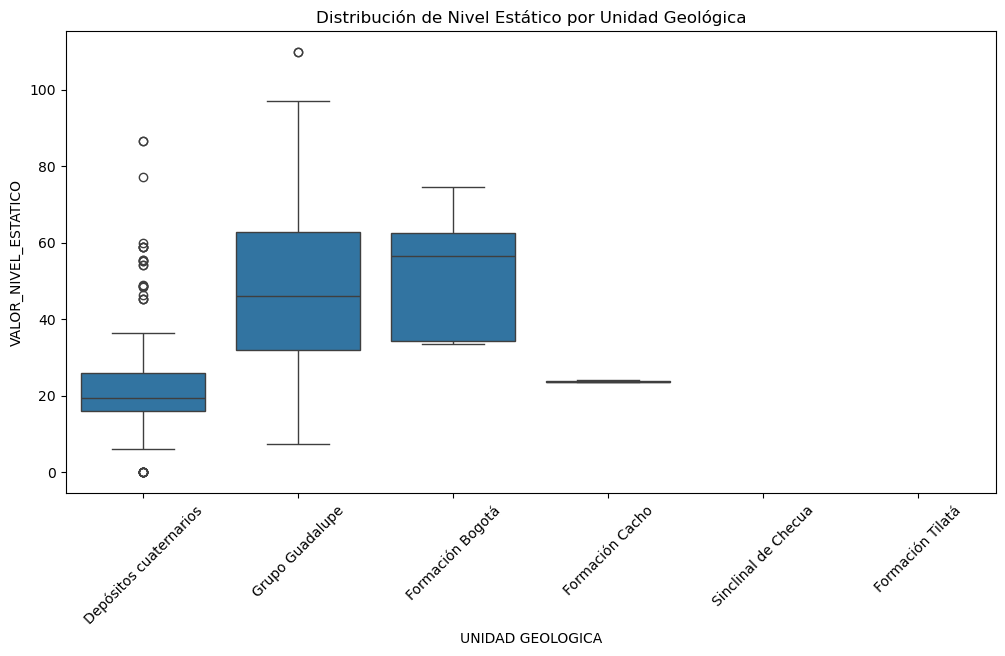

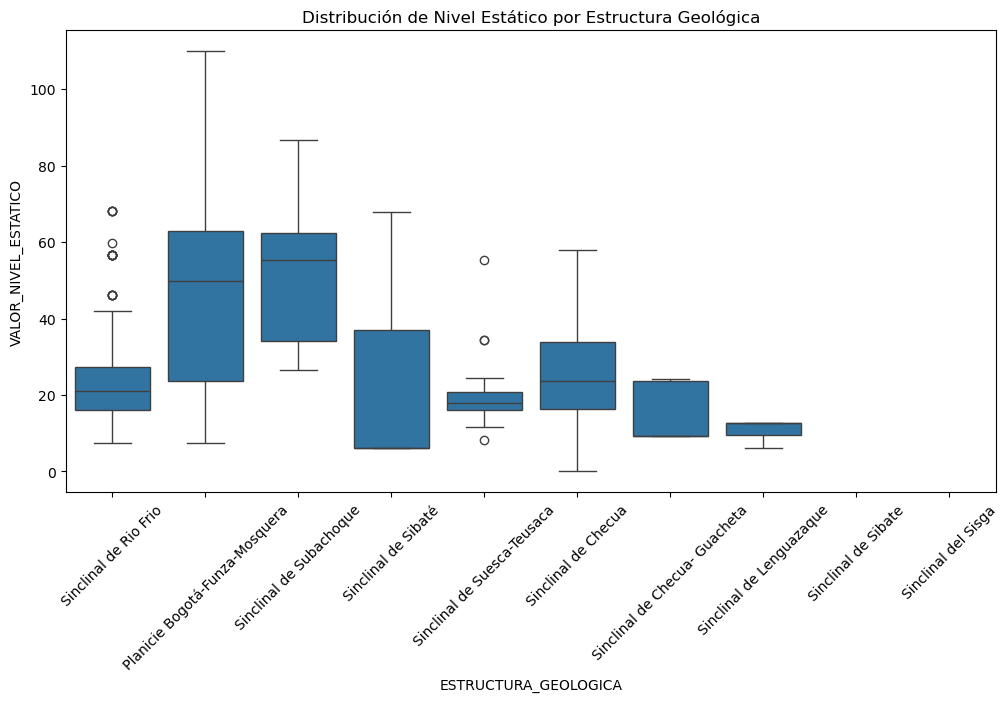

In [63]:


# Boxplot por unidad geológica
plt.figure(figsize=(12,6))
sns.boxplot(data=df_unique, x="UNIDAD GEOLOGICA", y="VALOR_NIVEL_ESTATICO")
plt.xticks(rotation=45)
plt.title("Distribución de Nivel Estático por Unidad Geológica")
plt.show()

# Boxplot por estructura geológica
plt.figure(figsize=(12,6))
sns.boxplot(data=df_unique, x="ESTRUCTURA_GEOLOGICA", y="VALOR_NIVEL_ESTATICO")
plt.xticks(rotation=45)
plt.title("Distribución de Nivel Estático por Estructura Geológica")
plt.show()


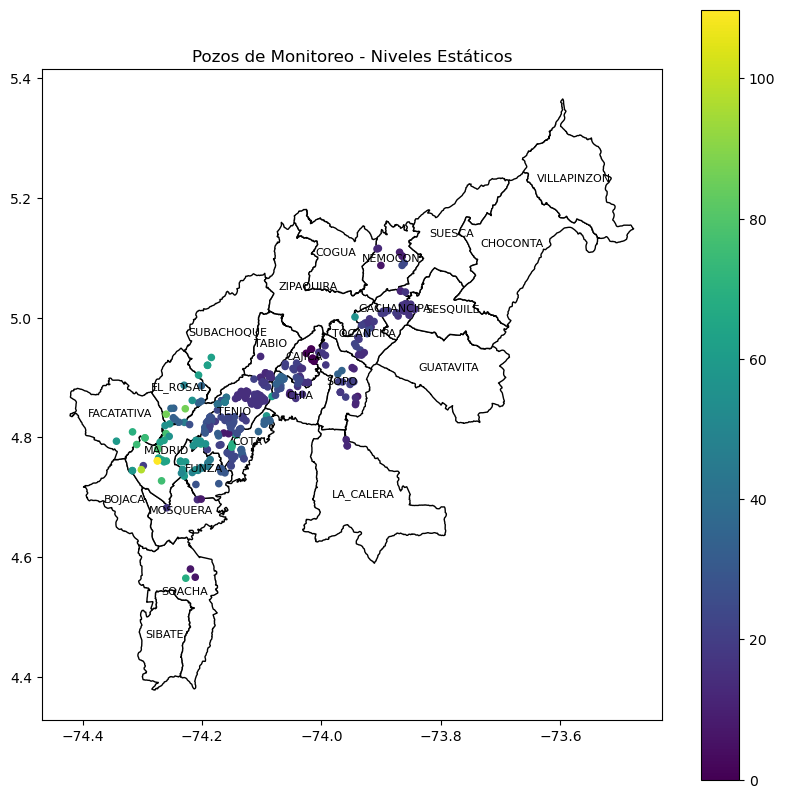

In [64]:


# Ejemplo: colorear por estructura geológica
fig, ax = plt.subplots(figsize=(10,10))
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

df_unique.plot(
    ax=ax, 
    column="VALOR_NIVEL_ESTATICO", 
    cmap="viridis", 
    legend=True, 
    markersize=20
)

# Etiquetas de municipios
for idx, row in sabana_bogota.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, row["MUNICIPIO"], fontsize=8, ha="center", color="black")

plt.title("Pozos de Monitoreo - Niveles Estáticos")
plt.show()


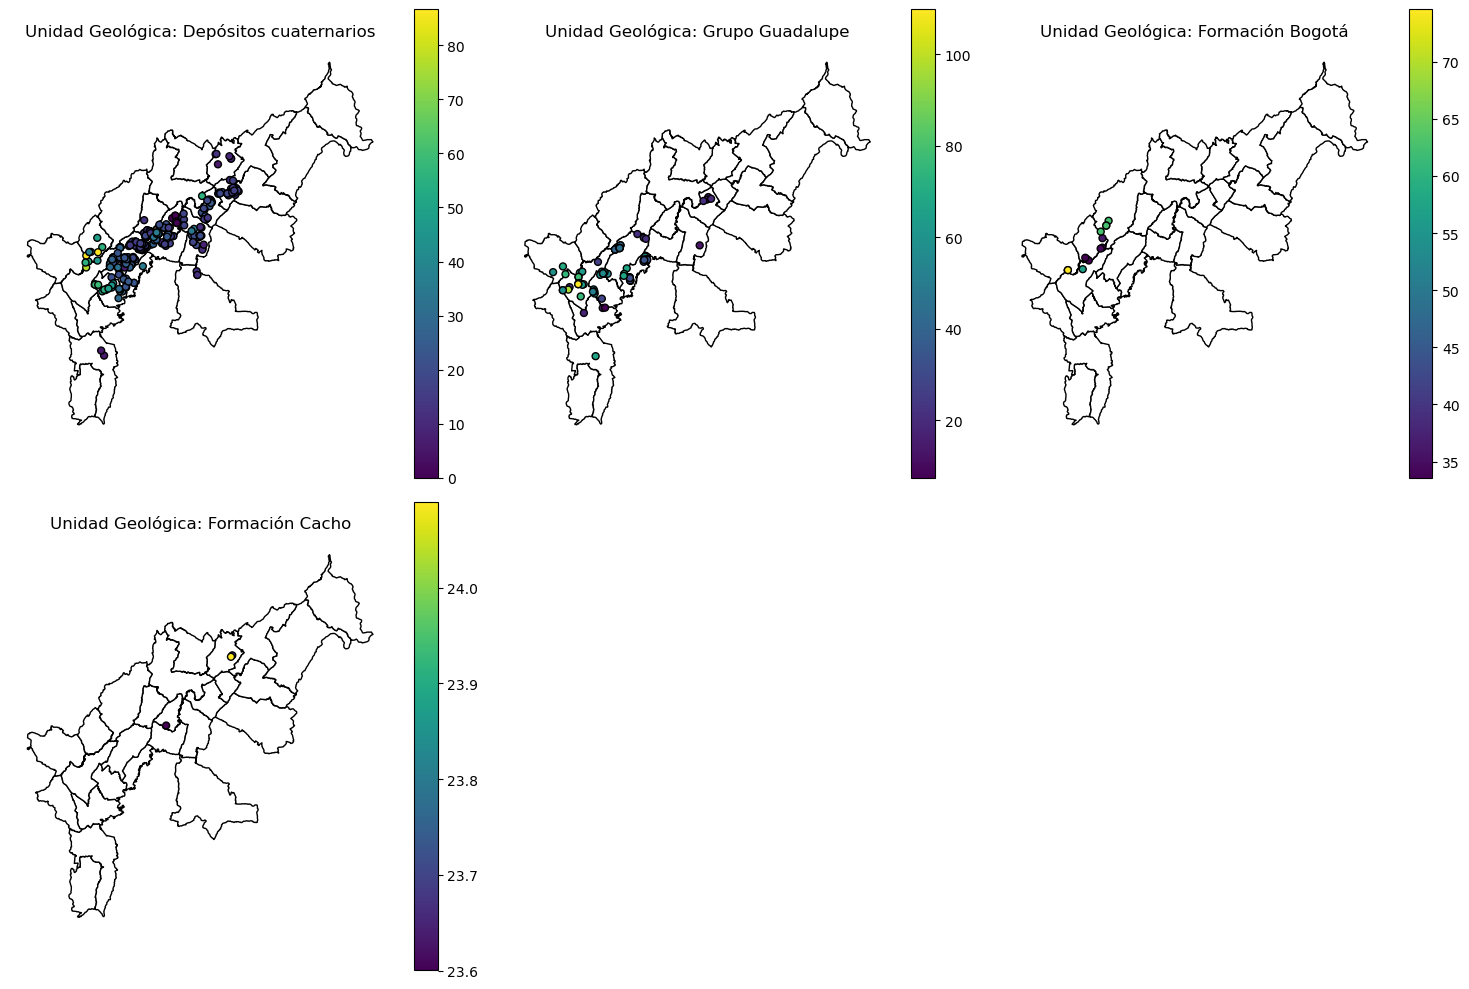

In [65]:
import matplotlib.pyplot as plt

# Filtrar solo los pozos que tienen valor de nivel estático
df_nivel = df_unique.dropna(subset=["VALOR_NIVEL_ESTATICO", "UNIDAD GEOLOGICA"])

# Unidades geológicas presentes
unidades = df_nivel["UNIDAD GEOLOGICA"].unique()

# Definir número de columnas para la grilla de subplots
n_cols = 3
n_rows = int(np.ceil(len(unidades) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, unidad in enumerate(unidades):
    ax = axes[i]
    sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

    subset = df_nivel[df_nivel["UNIDAD GEOLOGICA"] == unidad]
    subset.plot(
        ax=ax, 
        column="VALOR_NIVEL_ESTATICO", 
        cmap="viridis", 
        legend=True, 
        markersize=25,
        edgecolor="black"
    )

    ax.set_title(f"Unidad Geológica: {unidad}")
    ax.axis("off")

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


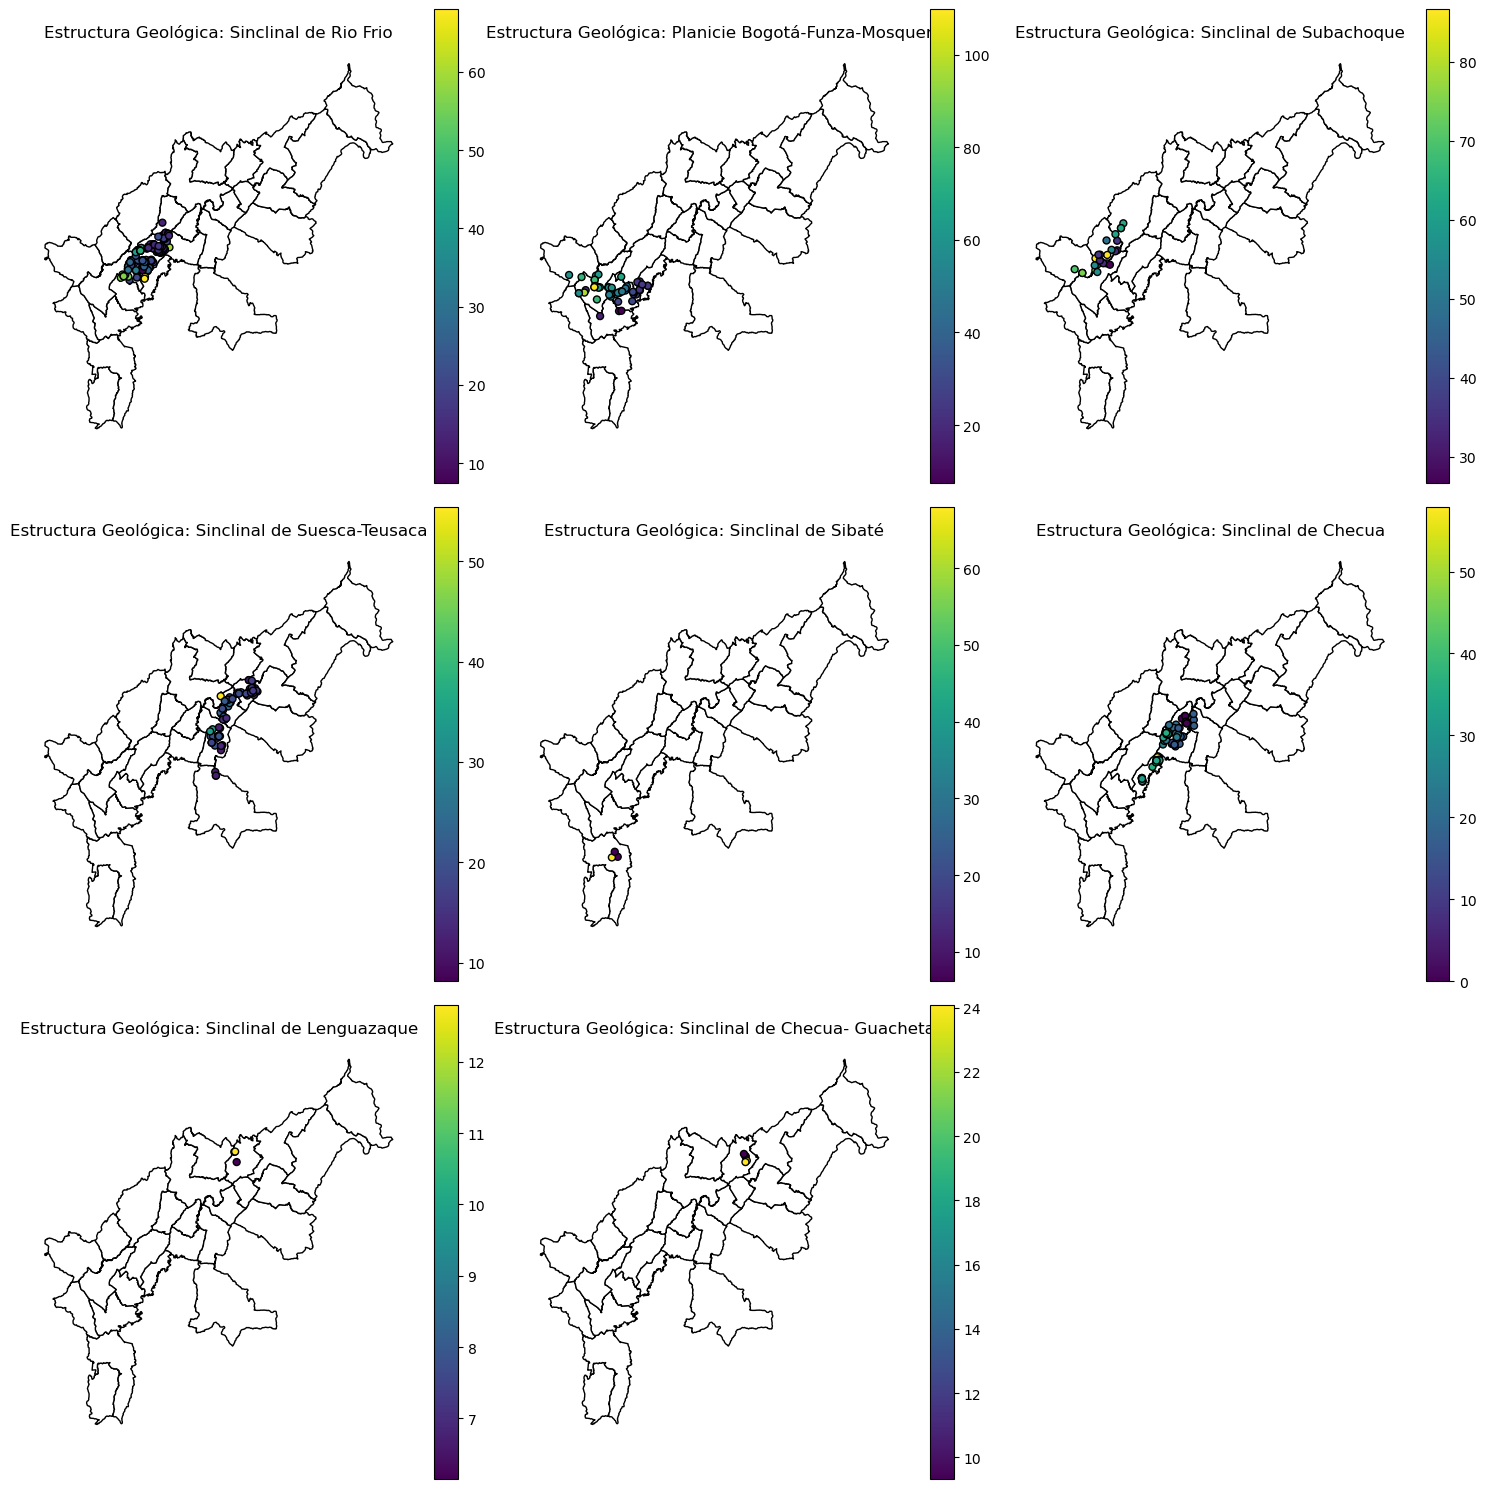

In [66]:
# Filtrar solo los pozos que tienen valor de nivel estático y estructura definida
df_nivel_estruc = df_unique.dropna(subset=["VALOR_NIVEL_ESTATICO", "ESTRUCTURA_GEOLOGICA"])

# Estructuras presentes
estructuras = df_nivel_estruc["ESTRUCTURA_GEOLOGICA"].unique()

# Definir número de columnas para la grilla de subplots
n_cols = 3
n_rows = int(np.ceil(len(estructuras) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, estructura in enumerate(estructuras):
    ax = axes[i]
    sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

    subset = df_nivel_estruc[df_nivel_estruc["ESTRUCTURA_GEOLOGICA"] == estructura]
    subset.plot(
        ax=ax, 
        column="VALOR_NIVEL_ESTATICO", 
        cmap="viridis", 
        legend=True, 
        markersize=25,
        edgecolor="black"
    )

    ax.set_title(f"Estructura Geológica: {estructura}")
    ax.axis("off")

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [67]:
df_unique.groupby(["UNIDAD GEOLOGICA", "TIPOUSO"])["VALOR_NIVEL_ESTATICO"].describe()


count       mean        std    min      25%  \
UNIDAD GEOLOGICA       TIPOUSO                                                  
Depósitos cuaternarios Agricola   191.0  22.472984  13.065947   0.00  15.7000   
                       Doméstico   56.0  23.561786  14.316718   6.19  16.1000   
                       Otro        12.0  18.186667   8.229850   0.00  15.7000   
                       Pecuario    42.0  21.394048   7.054781   6.15  16.1000   
Formación Bogotá       Agricola     8.0  47.201250  18.602006  33.56  34.0625   
                       Doméstico    5.0  56.712000  12.942361  33.56  62.5000   
                       Pecuario     0.0        NaN        NaN    NaN      NaN   
Formación Cacho        Agricola     3.0  23.796667   0.258908  23.60  23.6500   
                       Doméstico    0.0        NaN        NaN    NaN      NaN   
                       Otro         0.0        NaN        NaN    NaN      NaN   
                       Pecuario     0.0        NaN        NaN    NaN      NaN   
Formación Tilatá       Agricola     0.0        NaN        NaN    NaN      NaN   
Grupo Guadalupe        Agricola    49.0  49.351633  22.317199   7.43  34.2800   
                       Doméstico   20.0  46.234000  20.503526  14.12  33.6700   
                       Otro         1.0  69.770000        NaN  69.77  69.7700   
                       Pecuario     8.0  40.098750  17.986845  19.98  21.5125   
Sinclinal de Checua    Doméstico    0.0        NaN        NaN    NaN      NaN   
                       Otro         0.0        NaN        NaN    NaN      NaN   

                                     50%      75%     max  
UNIDAD GEOLOGICA       TIPOUSO                             
Depósitos cuaternarios Agricola   19.290  26.5200   86.66  
                       Doméstico  19.685  26.2450   86.63  
                       Otro       16.885  21.2375   36.37  
                       Pecuario   20.165  25.7900   45.41  
Formación Bogotá       Agricola   35.205  61.1125   74.62  
                       Doméstico  62.500  62.5000   62.50  
                       Pecuario      NaN      NaN     NaN  
Formación Cacho        Agricola   23.700  23.8950   24.09  
                       Doméstico     NaN      NaN     NaN  
                       Otro          NaN      NaN     NaN  
                       Pecuario      NaN      NaN     NaN  
Formación Tilatá       Agricola      NaN      NaN     NaN  
Grupo Guadalupe        Agricola   46.120  63.7200  109.84  
                       Doméstico  42.100  59.1425   77.44  
                       Otro       69.770  69.7700   69.77  
                       Pecuario   44.210  56.5800   56.58  
Sinclinal de Checua    Doméstico     NaN      NaN     NaN  
                       Otro          NaN      NaN     NaN

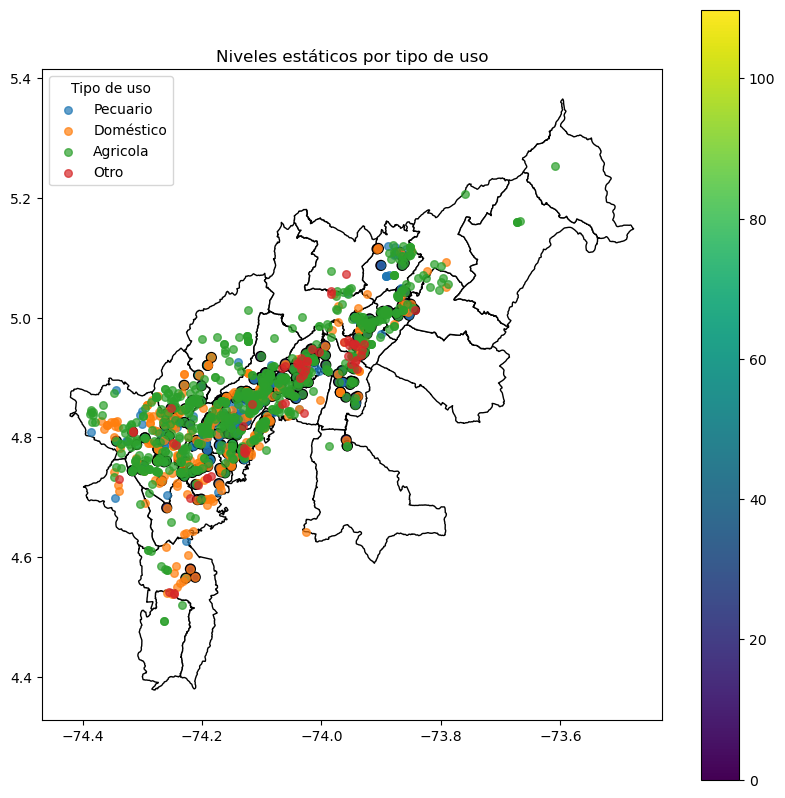

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
sabana_bogota.plot(ax=ax, color="white", edgecolor="black")

df_unique.plot(
    ax=ax, 
    column="VALOR_NIVEL_ESTATICO",
    cmap="viridis",
    markersize=50,
    legend=True,
    edgecolor="black"
)

for uso in df_unique["TIPOUSO"].unique():
    subset = df_unique[df_unique["TIPOUSO"] == uso]
    subset.plot(ax=ax, markersize=30, label=uso, alpha=0.7)

plt.legend(title="Tipo de uso")
plt.title("Niveles estáticos por tipo de uso")
plt.show()


In [69]:
def outliers_por_uso(df):
    resultados = {}
    for uso, sub in df.groupby("TIPOUSO"):
        Q1 = sub["VALOR_NIVEL_ESTATICO"].quantile(0.25)
        Q3 = sub["VALOR_NIVEL_ESTATICO"].quantile(0.75)
        IQR = Q3 - Q1
        limite_inf = Q1 - 1.5*IQR
        limite_sup = Q3 + 1.5*IQR
        outliers = sub[(sub["VALOR_NIVEL_ESTATICO"] < limite_inf) | (sub["VALOR_NIVEL_ESTATICO"] > limite_sup)]
        resultados[uso] = outliers
    return resultados

outliers_dict = outliers_por_uso(df_unique)


In [70]:
outliers_dict

{'Agricola':       POZO_ASIGNADO_AL_PUNTO  DISTANCIA_M_AL_POZO_ASIGNADO  IDUSUARIO  \
 684                CAMRB0310                    460.104310    7093641   
 703                CAMRB0283                    222.235559    7093646   
 6609          CAMRB0312-0553                     10.793820    7096169   
 6685               CAMRB0316                    153.590160    7060220   
 12754              CAMRB0310                    459.662548    7096543   
 18493              CAMRB0191                   2036.218251    7096928   
 22369              CAMRB0315                      4.580339    7097096   
 22540              CAMRB0315                      4.580339    7097096   
 24393              CAMRB0316                    310.352958    7060220   
 34373              CAMRB0342                    299.249991    7099745   
 37826         CAMRB0287-0532                    344.270809    7096778   
 39088              CAMRB0251                   1820.638718    7101156   
 50672              CAMRB0

In [71]:
df_unique.TIPOUSO.unique()

array(['Pecuario', 'Doméstico', 'Agricola', 'Otro'], dtype=object)

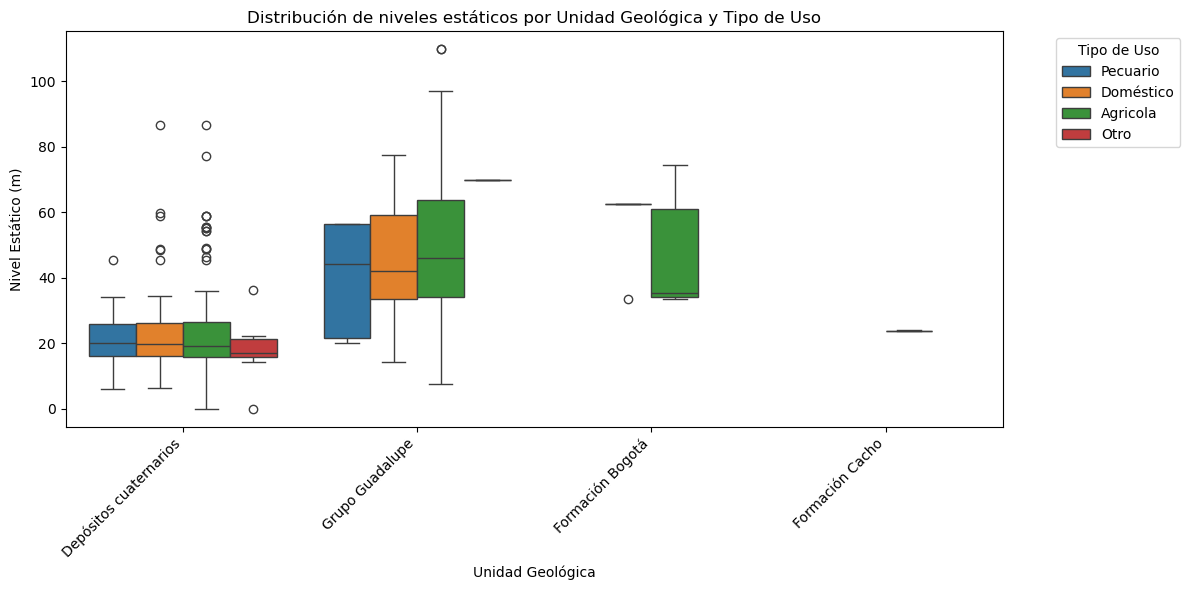

In [72]:
# Filtrar solo registros válidos
df_boxplot = df_unique.dropna(
    subset=["VALOR_NIVEL_ESTATICO", "UNIDAD GEOLOGICA", "TIPOUSO"]
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_boxplot,
    x="UNIDAD GEOLOGICA",
    y="VALOR_NIVEL_ESTATICO",
    hue="TIPOUSO",
    showfliers=True
)

plt.xticks(rotation=45, ha="right")
plt.title("Distribución de niveles estáticos por Unidad Geológica y Tipo de Uso")
plt.ylabel("Nivel Estático (m)")
plt.xlabel("Unidad Geológica")
plt.legend(title="Tipo de Uso", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [73]:
df_unique.columns

Index(['POZO_ASIGNADO_AL_PUNTO', 'DISTANCIA_M_AL_POZO_ASIGNADO', 'IDUSUARIO',
       'IDPREDIO', 'IDCONCESION', 'IDCAPTACION', 'IDUSO',
       'MUNICIPIO_PUNTO_CAPTACION', 'OFERTA_HIDRICA_TOTAL',
       'OFERTA_DISPONIBLE', 'ESTADO_CAPTACION', 'CAUDAL_CONCESIONADO',
       'CAUDAL_ASIGNADO', 'TIPOUSO', 'DESCRIPCION_ACCESO', 'NOMBREFUENTE',
       'TIPOFUENTECAPTACION', 'SUBZONA', 'CONTINUIDAD', 'GRADOS_LAT',
       'MINUTOS_LAT', 'SEGUNDOS_LAT', 'GRADOS_LONG', 'MINUTOS_LONG',
       'SEGUNDOS_LONG', 'CODIGOCIUU', 'DESCRIPCIONCIUU', 'FECHA_INICIO',
       'FECHA_FIN', 'LAT_DD_calc', 'LONG_DD_calc', 'RATIO_ASIGNADO_DISPONIBLE',
       'RATIO_CONCESIONADO_TOTAL', 'RATIO_CONCESIONADO_DISPONIBLE',
       'RATIO_ASIGNADO_CONCESIONADO', 'RIESGO_ASIG_DISP', 'REGION',
       'GEOMETRIA_PUNTO_CAPTACION', 'ID_POZO_MONITOREO',
       'MUNICIPIO_POZO_MONITOREO', 'CUENCA_HIDROGRAFICA', 'NORTE', 'ESTE',
       'ESTRUCTURA_GEOLOGICA', 'UNIDAD GEOLOGICA', 'VALOR_NIVEL_ESTATICO',
       'FECHA_MEDICION_

# Caudal Concesionado

In [74]:
var3 = "CAUDAL_CONCESIONADO"
series3 = df_unique[var3]

In [75]:
print(series3.describe())
print("Valores nulos:", series3.isna().sum())
print("Valores negativos:", (series3.dropna() < 0).sum())

count    1129.000000
mean        1.849931
std         5.168856
min         0.001000
25%         0.055000
50%         0.320000
75%         1.610000
max        64.000000
Name: CAUDAL_CONCESIONADO, dtype: float64
Valores nulos: 0
Valores negativos: 0


In [76]:
series3.max()

64.0

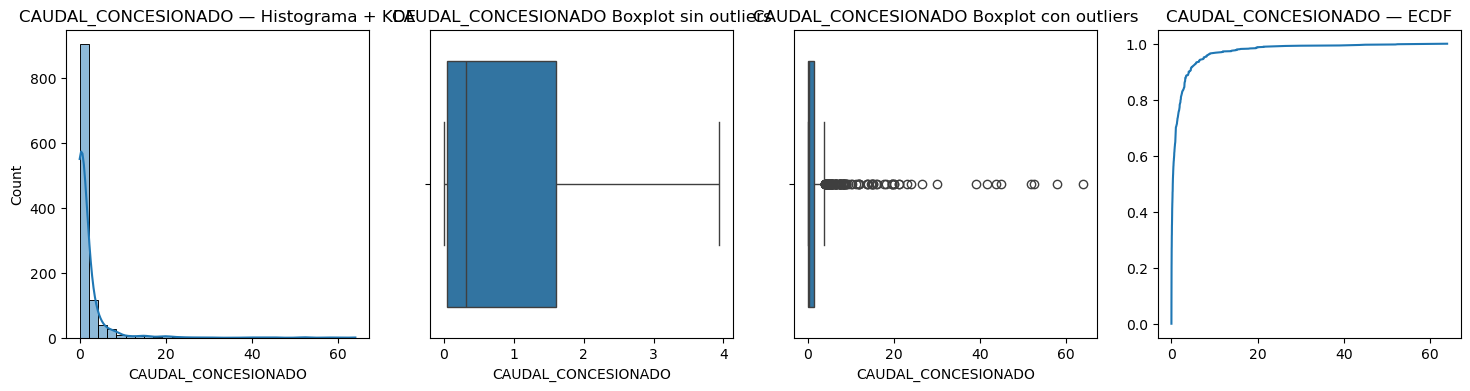

In [77]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Histograma + KDE
sns.histplot(series3.dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f"{var3} — Histograma + KDE")

# Boxplot sin outliers
sns.boxplot(x=series3.dropna(),showfliers=False, ax=axes[1])
axes[1].set_title(f"{var3} Boxplot sin outliers")

# Boxplot con outliers
sns.boxplot(x=series3.dropna(), ax=axes[2])
axes[2].set_title(f"{var3} Boxplot con outliers")


# ECDF (función de distribución acumulada empírica)
s = series3.dropna()
x = np.sort(s)
y = np.arange(1, len(x)+1) / len(x)
axes[3].plot(x, y)
axes[3].set_title(f"{var3} — ECDF")

plt.show()

In [78]:
Q1 = series3.quantile(0.25)
Q3 = series3.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = series3[(series3 < lower) | (series3 > upper)]
print(f"Outliers por IQR: {len(outliers_iqr)}")

Outliers por IQR: 121


In [79]:
median = series3.median()
mad = (np.abs(series3 - median)).median()
mz = 0.6745 * (series3 - median) / mad
outliers_mz = series3[np.abs(mz) > 3.5]

print(f"Outliers por Modified Z-Score: {len(outliers_mz)}")

Outliers por Modified Z-Score: 256


In [80]:
# Calcular los límites IQR
Q1 = df_unique["CAUDAL_CONCESIONADO"].quantile(0.25)
Q3 = df_unique["CAUDAL_CONCESIONADO"].quantile(0.75)
IQR = Q3 - Q1

# Umbrales
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers_caudal = df_unique[
    (df_unique["CAUDAL_CONCESIONADO"] < lim_inf) | 
    (df_unique["CAUDAL_CONCESIONADO"] > lim_sup)
]

print(f"Outliers detectados: {len(outliers_caudal)}")
outliers_caudal[["IDUSUARIO", "TIPOUSO", "UNIDAD GEOLOGICA", "CAUDAL_CONCESIONADO"]].head(10)


Outliers detectados: 121


IDUSUARIO    TIPOUSO        UNIDAD GEOLOGICA  CAUDAL_CONCESIONADO
1956     7093708   Agricola  Depósitos cuaternarios             4.980000
2653     7076638   Agricola         Grupo Guadalupe             6.480000
2729     7095831   Agricola         Grupo Guadalupe             6.530000
2748     7095835   Pecuario         Grupo Guadalupe             4.320000
3394     7095994   Agricola  Depósitos cuaternarios             7.110000
6377     7096153   Agricola                    None             5.070000
6952     7096198  Doméstico  Depósitos cuaternarios             6.600000
7294     7096227   Agricola  Depósitos cuaternarios             7.820000
8149     7096251       Otro         Grupo Guadalupe            10.330000
10062    7096383       Otro         Grupo Guadalupe            41.700001

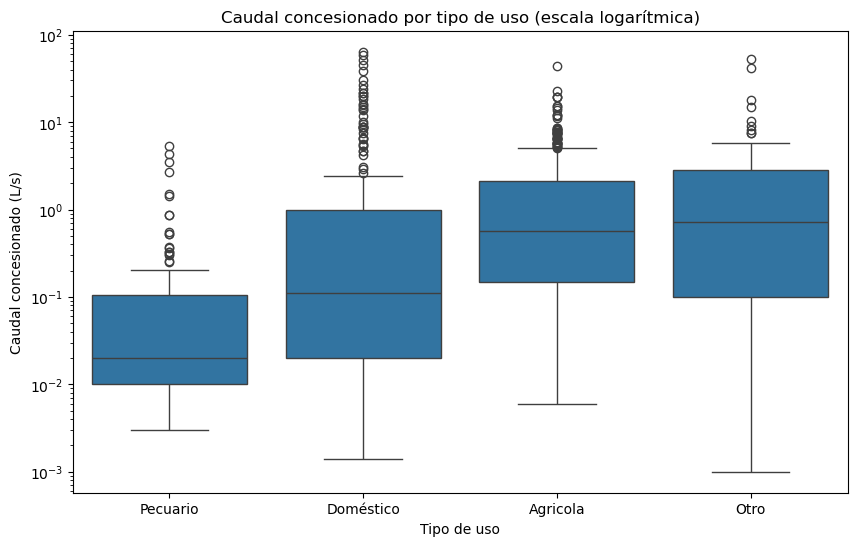

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_unique, x="TIPOUSO", y="CAUDAL_CONCESIONADO")
plt.yscale("log")
plt.title("Caudal concesionado por tipo de uso (escala logarítmica)")
plt.xlabel("Tipo de uso")
plt.ylabel("Caudal concesionado (L/s)")
plt.show()


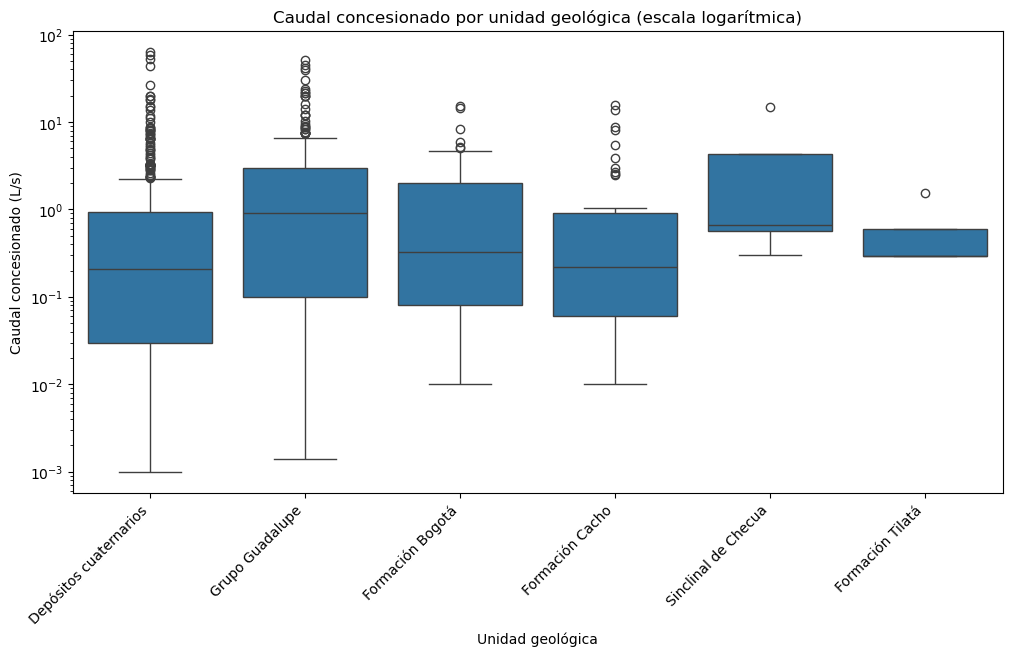

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_unique, x="UNIDAD GEOLOGICA", y="CAUDAL_CONCESIONADO")
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.title("Caudal concesionado por unidad geológica (escala logarítmica)")
plt.xlabel("Unidad geológica")
plt.ylabel("Caudal concesionado (L/s)")
plt.show()


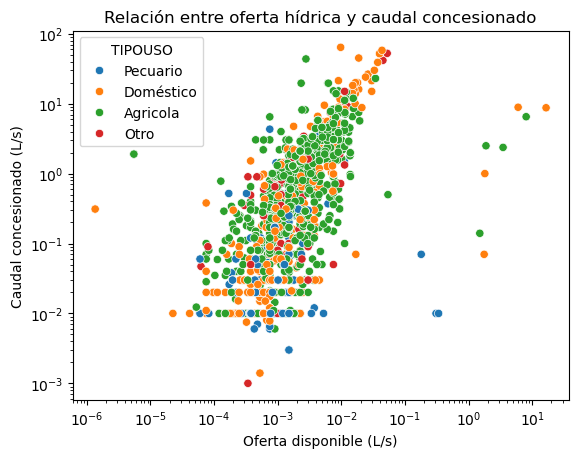

In [83]:
sns.scatterplot(
    data=df_unique, 
    x="OFERTA_DISPONIBLE", 
    y="CAUDAL_CONCESIONADO", 
    hue="TIPOUSO"
)
plt.xscale("log")
plt.yscale("log")
plt.title("Relación entre oferta hídrica y caudal concesionado")
plt.xlabel("Oferta disponible (L/s)")
plt.ylabel("Caudal concesionado (L/s)")
plt.show()


# OFERTA HIDRICA TOTAL

In [85]:
var4 = "OFERTA_HIDRICA_TOTAL"
series4 = df_unique[var4]

In [86]:
print(series4.describe())
print("Valores nulos:", series4.isna().sum())
print("Valores negativos:", (series4.dropna() < 0).sum())

count    1127.000000
mean        0.053616
std         0.790015
min         0.000000
25%         0.000920
50%         0.002000
75%         0.005000
max        22.000000
Name: OFERTA_HIDRICA_TOTAL, dtype: float64
Valores nulos: 2
Valores negativos: 0


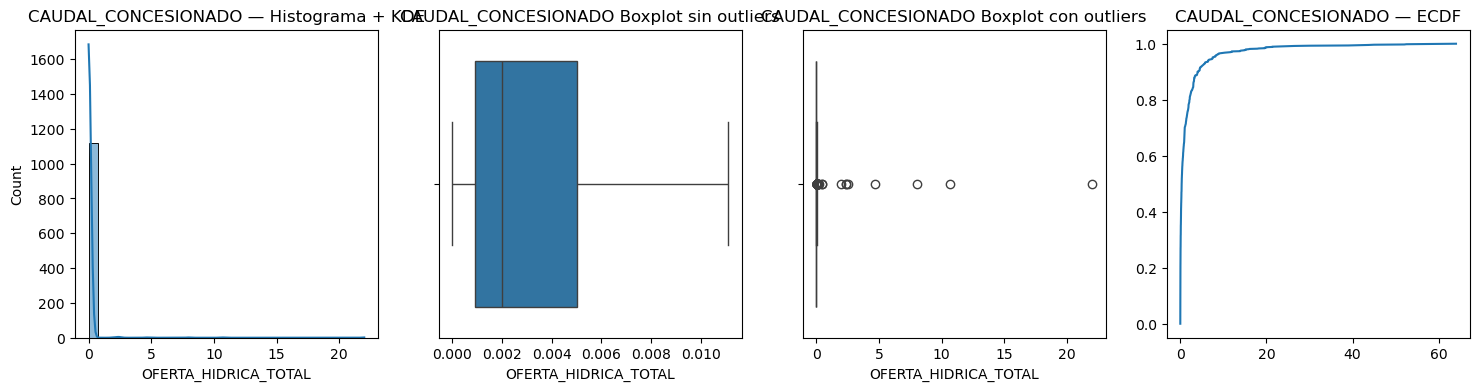

In [87]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Histograma + KDE
sns.histplot(series4.dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f"{var3} — Histograma + KDE")

# Boxplot sin outliers
sns.boxplot(x=series4.dropna(),showfliers=False, ax=axes[1])
axes[1].set_title(f"{var3} Boxplot sin outliers")

# Boxplot con outliers
sns.boxplot(x=series4.dropna(), ax=axes[2])
axes[2].set_title(f"{var3} Boxplot con outliers")


# ECDF (función de distribución acumulada empírica)
s = series3.dropna()
x = np.sort(s)
y = np.arange(1, len(x)+1) / len(x)
axes[3].plot(x, y)
axes[3].set_title(f"{var3} — ECDF")

plt.show()

In [88]:
Q1 = series4.quantile(0.25)
Q3 = series4.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = series4[(series3 < lower) | (series4 > upper)]
print(f"Outliers por IQR: {len(outliers_iqr)}")

Outliers por IQR: 109


In [89]:
median = series4.median()
mad = (np.abs(series4 - median)).median()
mz = 0.6745 * (series4 - median) / mad
outliers_mz = series4[np.abs(mz) > 3.5]

print(f"Outliers por Modified Z-Score: {len(outliers_mz)}")

Outliers por Modified Z-Score: 164


# PROFUNDIDAD MEDIA RECIENTE METROS

In [92]:
var5 = "PROFUNDIDAD_MEDIA_RECIENTE_M"
series5 = df_unique[var5]

In [93]:
print(series5.describe())
print("Valores nulos:", series5.isna().sum())
print("Valores negativos:", (series5.dropna() < 0).sum())

count    949.000000
mean      42.935848
std       36.081252
min       -0.810000
25%       17.115000
50%       26.520000
75%       68.290000
max      162.098000
Name: PROFUNDIDAD_MEDIA_RECIENTE_M, dtype: float64
Valores nulos: 180
Valores negativos: 5


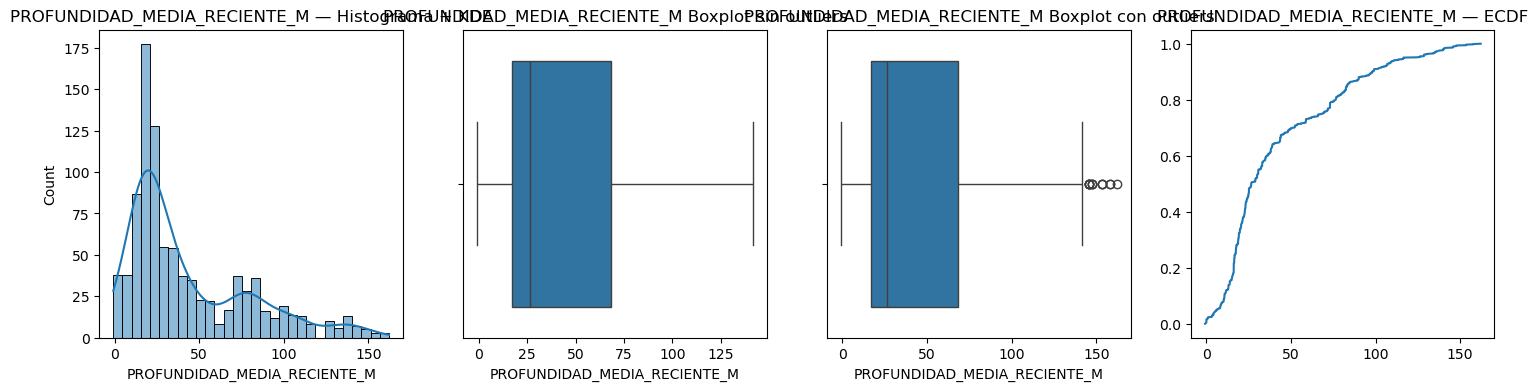

In [94]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Histograma + KDE
sns.histplot(series5.dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f"{var5} — Histograma + KDE")

# Boxplot sin outliers
sns.boxplot(x=series5.dropna(),showfliers=False, ax=axes[1])
axes[1].set_title(f"{var5} Boxplot sin outliers")

# Boxplot con outliers
sns.boxplot(x=series5.dropna(), ax=axes[2])
axes[2].set_title(f"{var5} Boxplot con outliers")


# ECDF (función de distribución acumulada empírica)
s = series5.dropna()
x = np.sort(s)
y = np.arange(1, len(x)+1) / len(x)
axes[3].plot(x, y)
axes[3].set_title(f"{var5} — ECDF")

plt.show()

In [95]:
Q1 = series5.quantile(0.25)
Q3 = series5.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_iqr = series5[(series5 < lower) | (series5 > upper)]
print(f"Outliers por IQR: {len(outliers_iqr)}")

Outliers por IQR: 14


In [96]:
median = series5.median()
mad = (np.abs(series5 - median)).median()
mz = 0.6745 * (series5 - median) / mad
outliers_mz = series4[np.abs(mz) > 3.5]

print(f"Outliers por Modified Z-Score: {len(outliers_mz)}")

Outliers por Modified Z-Score: 111


In [100]:
# Use direct assignment to modify the column
df_unique['PROFUNDIDAD_MEDIA_RECIENTE_M'] = df_unique['PROFUNDIDAD_MEDIA_RECIENTE_M'].fillna(
    df_unique['PROFUNDIDAD_MEDIA_RECIENTE_M'].median()
)

C:\Users\Andres\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [103]:
df_unique.PROFUNDIDAD_MEDIA_RECIENTE_M.min()

-0.81